
# **Predicting Vehicle Insurance Interest Among Health Policyholders**

>About My Thought

There is more opportunity for upselling and cross-selling in banking than in any other industry, Cross-selling in banking occurs when a bank associate attempts to sell an existing customer additional financial products. Examples of some products offered when cross-selling are debit cards, auto loans, or investment services.



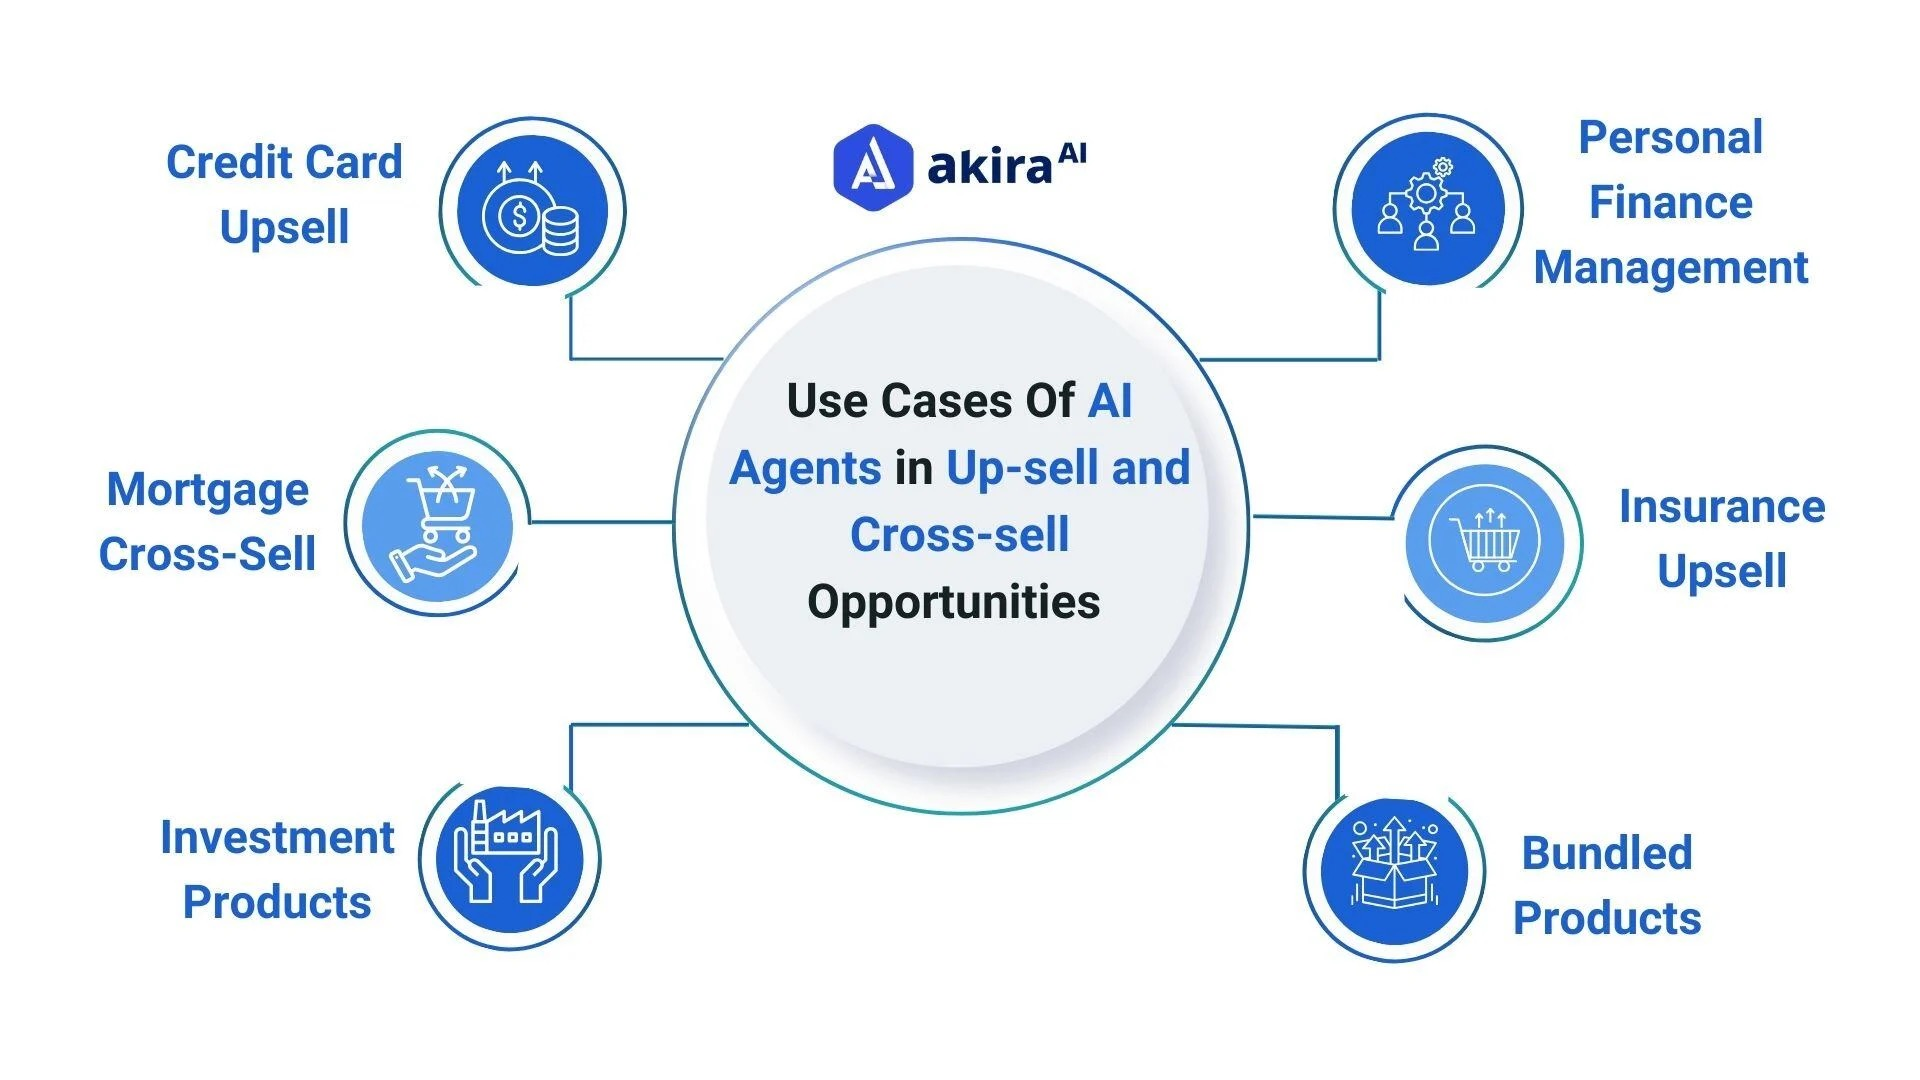

**Content Summary**
1. Understand and Hypothesis the problem

2. Exploratory Data Analysis

>**Trend, Trait and distribution across all features**

> **insights : Cross-sell Target Customer Personas**

> **insights : Revealing Potential Channels and Areas for Engagement**

3. Feature Engineering : 

> **Binning** and **Categorical Encoding**

4. Feature selection 

> with **EDA insights**, **Correlation Heatmap** and **mutual_info_classif**


**Modeling and Evaluation**

**Algorithms**
   
>- **single model**: Decision Tree 
 >- **ensemble method**: Random Forest 
 >- **boosting technique**: CatBoost for complex patterns.



**Comparing pipelines with Stratified KFold & RandomizedSearch Hyperparameters Tuning.**

1) **Baseline Features**

> - Uses original features as a benchmark for comparison.

2) **Baseline +  Feature Engineering**

> - feature selection using mutual_info_classif.
>   
> - Improves pattern recognition and model generalization.

3) **Baseline + Feature Engineering + ADASYN**

> - Enhances minority class learning with oversampling


**Evaluation Metric : F1 score**

8. Best model Prediction and Feature Importance

9. Conclusion and Recommendations in business terms for converting and raising customers interest


**Introduction**
> Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.


**Problem Statements and Business Goal**
>1. Doing the Exploratory Data Analysis (EDA) to gain the customer insight.
2. Building the model(s) to predict whether a customer would be interested in vehicle insurance with providing data about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.


 **Data Description**
 
> 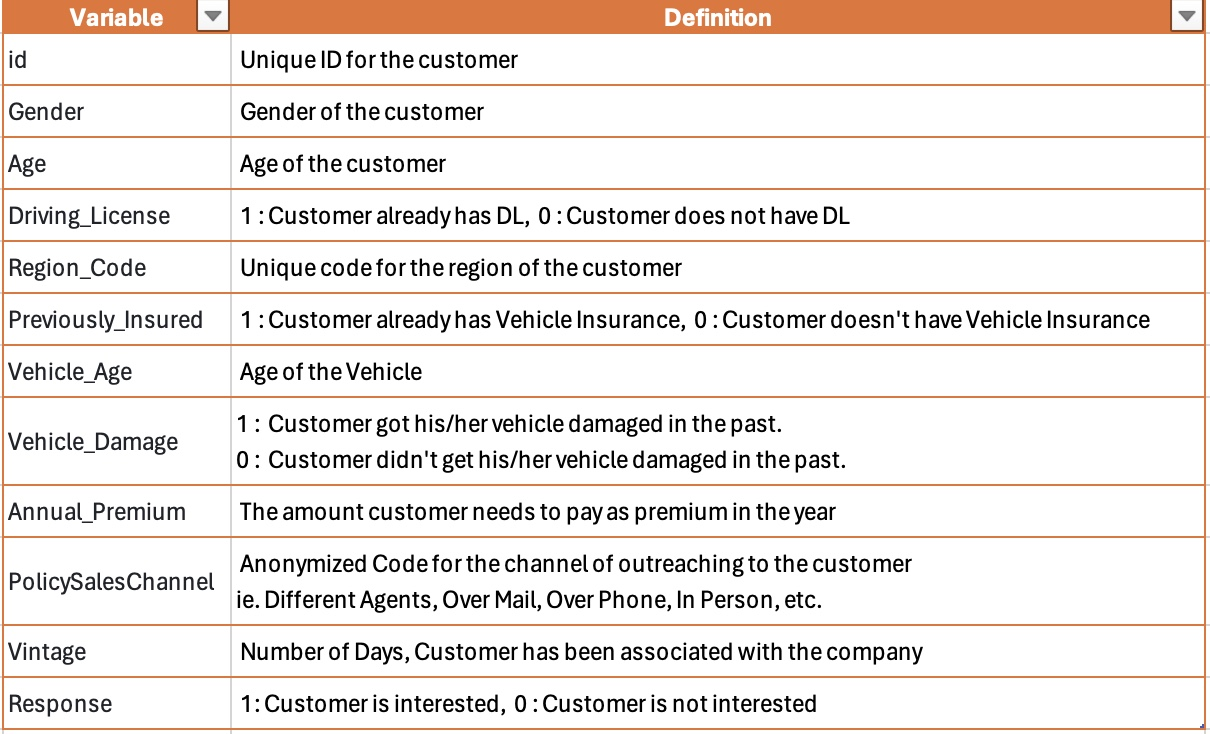

Data Source : https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction?select=train.csv

**Hypothesis on problem statement:**

1. Those who already had previously vehicle insurance could show as not interested.

2. Those with a history of vehicle damage are more interested in obtaining insurance.

2. Men could generally show greater interest in car insurance than women.

4. Policy Sales Channel could bring out the interested customer with shared preferences and behaviours on their unique ways based which we could see are there any notable trends

5. Older customers and older vehicles are associated with higher interest.

> We would take a look on this in process of EDA.

In [10]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
sns.set(style='whitegrid')

In [39]:
raw = pd.read_csv("/Users/joesrwt/Desktop/sip 2025 joee/cross sell prediction/train.csv")
test_df = pd.read_csv("/Users/joesrwt/Desktop/sip 2025 joee/cross sell prediction/test.csv")

# **Data Cleaning**


# 1) Explore the data

In [16]:
raw

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [18]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


***

# 2) Cheking the Missing values

In [7]:
missing_values = raw.isnull().sum()
missing_values

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

> It showed that there is no missing values

# 3) Check for the duplicate rows

In [8]:
raw.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
381104    False
381105    False
381106    False
381107    False
381108    False
Length: 381109, dtype: bool

>And there is no duplicate rows



***

# *To get some insights of our customers*
># Exploratory Data Analysis 
- Trend and trait of Each Features
- Connections across other features

Since, there is no missing values and duplicate rows. Next, we would identify columns that contain categorical patterns or have a limited set of unique values. After that we would look into the distributions, then dig deeper for some meaningful insight.

In [9]:
raw.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

**Interpretation** :
>Each features showed various patterns, we should classify them based on their nature :
>
> * Binary Features : **'Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Damage', 'Response'**
>
> * Multi Categorical Features : **'Vehicle_Age', 'Policy_Sales_Channel', 'Region_Code'**
>
> * Numerical Features : **'Age', 'Annual_Premium', 'Vintage'**

it might be better to be excluded **'id' feature** since it didn't provide meaningful and wasn't needed for subsequent analyses


In [10]:
raw.drop(columns='id',inplace=True)
raw.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


**Quick-looking Interpretation** :

>Response : 12.25% are interested was very low which could be class imbalance issue.
>
>Driving_License : Nearly all the people have a Driving license
>
>Annual_Premium : Their max (= 540165.00) seems very high compared to their mean (= 30564.389581). 

**Moreover,**
>From output, some categoricals which neither binary nor numerical, ex. **Policy_Sales_Channel, Region_Code** need some visualization techniques to effectively communicate the data patterns.


# Univariate Analysis
* Target Variable : **Response**

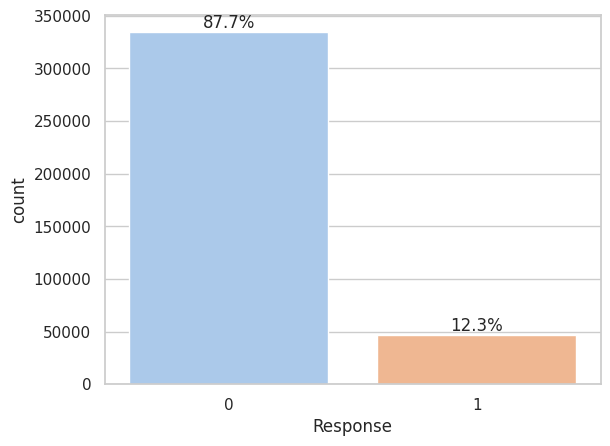

In [11]:
bp = sns.countplot(x='Response', data=raw, palette ='pastel')

# Calculate percentages for each bar

total = len(raw['Response'])
for p in bp.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    bp.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

**Target Variable Interpretation** : 

>From the plot, the training dataset has an clearly **imbalance distribution of classes**, this could lead to poor performance on the minority class, We would address class imbalance in the target variable after performing outlier handling as an appropriate strategies.  

reference : https://medium.com/metaor-artificial-intelligence/solving-the-class-imbalance-problem-58cb926b5a0f


***

* **Features Distribution**
> Binary-categorical : **Gender, Driving_License, Previously_Insured, Vehicle_Damage**

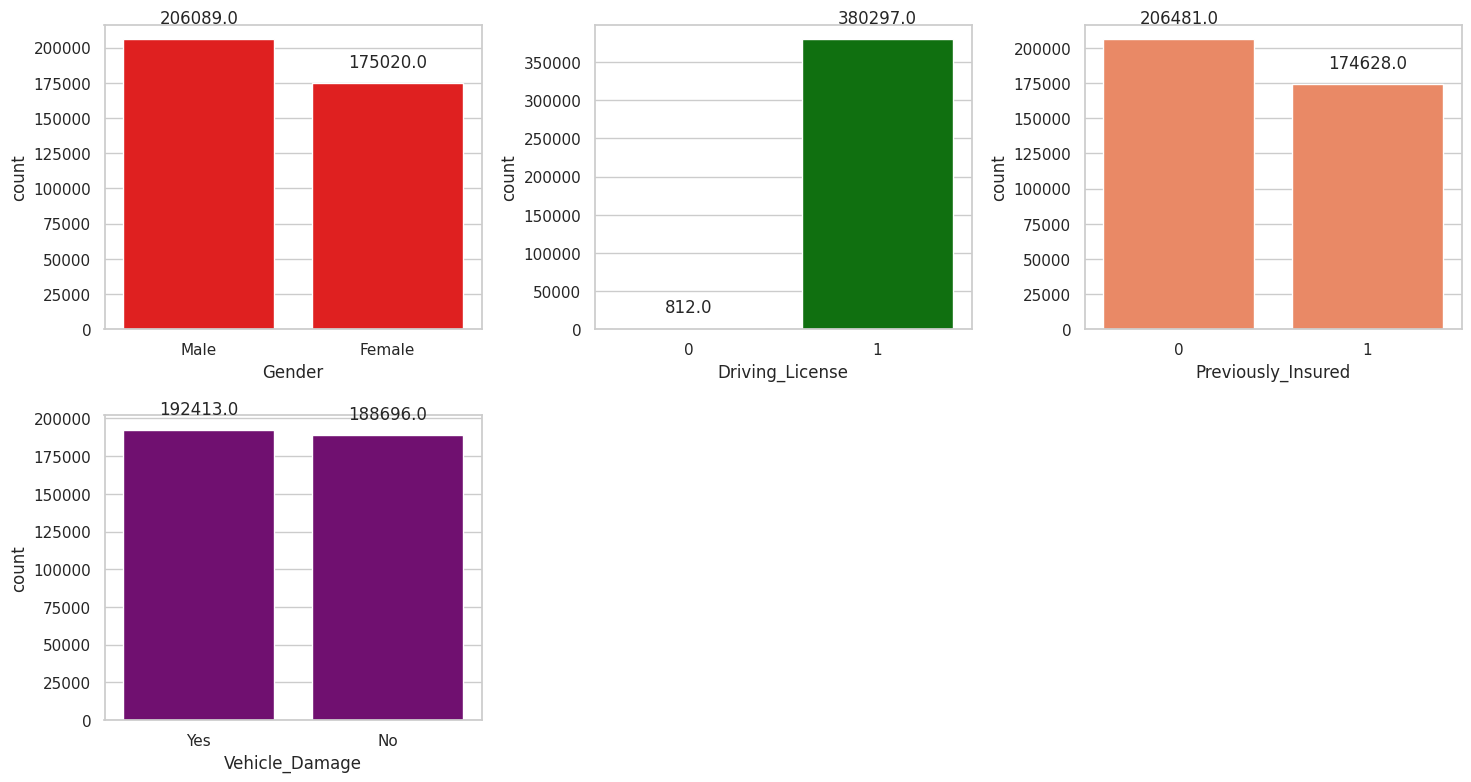

In [12]:


fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

# Plot distributions using Seaborn

sns.countplot(x='Gender', data=raw, color="red", ax=axes[0, 0])
sns.countplot(x='Driving_License', data=raw, color="green", ax=axes[0, 1])
sns.countplot(x='Previously_Insured', data=raw, color="coral", ax=axes[0, 2])
sns.countplot(x='Vehicle_Damage', data=raw, color="purple", ax=axes[1, 0])
for ax in axes.flatten():
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 15), textcoords='offset points')


# Adjust layout
plt.tight_layout()
fig.delaxes(axes[1, 2])
fig.delaxes(axes[1,1])

# Show the plot
plt.show()

> **Other Categorical & Numerical features** 

In [13]:
#unique values in each features
raw.nunique()

Gender                      2
Age                        66
Driving_License             2
Region_Code                53
Previously_Insured          2
Vehicle_Age                 3
Vehicle_Damage              2
Annual_Premium          48838
Policy_Sales_Channel      155
Vintage                   290
Response                    2
dtype: int64

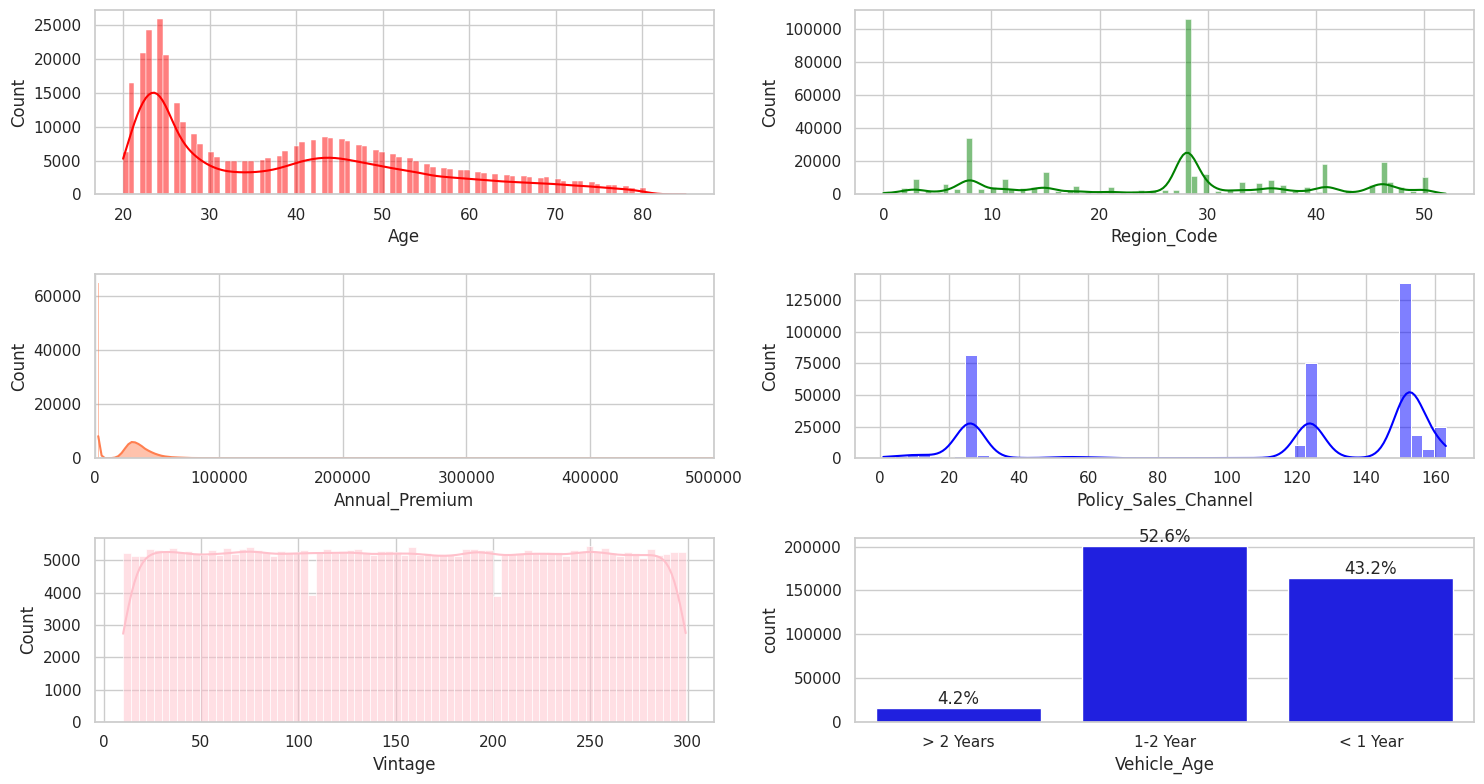

In [14]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 8))

# Plot distributions using Seaborn
sns.histplot(raw['Age'], kde=True, color="red", ax=axes[0, 0])
sns.histplot(raw['Region_Code'], kde=True, color="green", ax=axes[0, 1])

# We extend x-axis for 'Annual_Premium' as their max is extremely high value.
annual_premium_plot = sns.histplot(raw['Annual_Premium'], kde=True, color="coral", ax=axes[1, 0])
annual_premium_plot.set_xlim(0, 500000)  # Adjust the limits as needed

sns.histplot(raw['Policy_Sales_Channel'], kde=True, color="blue", ax=axes[1, 1])
sns.histplot(raw['Vintage'], kde=True, color="pink", ax=axes[2, 0])

sns.countplot(x='Vehicle_Age', data=raw, color="blue", ax=axes[2, 1])

total = len(raw['Vehicle_Age'])
for p in axes[2, 1].patches: 
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    axes[2, 1].annotate(percentage, (x, y), ha='center', va='bottom')  
plt.tight_layout()
plt.show()

Quick-looking :
> * **Age** has a high peak at aged 20-30 distributed as right-skewed pattern
> * **Vehicle_Age** : less than 5% of customers own vehicles aged over 2 years, and has a peak between 1-2 year.
> * There is a high imbalance in **Driving_License**, 99.7% of customers has a driving license.
> * there are some outstanding peaks on **Region_Code** and **Policy_Sales_Channel**
> * **Annual_Premium** showed that the rigth-skewed pattern 

On **Region_Code, Policy_Sales_Channel, Age, Vintage and Annual_Premium**, we are going to clarified more later.

***
**From the function below**, we identify the values with the highest counts in the specified column, then indicate positions of them among their overall distribution.

> Plot 1: Bar Chart for observing some of highest count values:
> showing the percentage of each of them in specified features.
> 
> Plot 2: Histogram for Overall Distribution:
> Red dashed lines are added to indicate the positions of those values.

In [15]:
#for multinomial-categoricals
def multi_cat_top10_and_distribution_plots(data, column_name):
    # Get top 10 counts and overall distribution
    value_counts = data[column_name].value_counts()
    total_counts = len(data)
    top10_counts = value_counts.sort_values().tail(10)
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Bar chart for top 10 with percentage and annotations
    top10_percentages = top10_counts / total_counts * 100
    sns.barplot(x=top10_percentages.index, y=top10_percentages.values, ax=axes[0], color="red")
    axes[0].set_xlabel(f'Top 10 {column_name} (Percentage)')
    axes[0].set_ylabel('Percentage')

    for p in axes[0].patches:
        axes[0].annotate(f'{p.get_height():.2f}% ', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')
     # Histogram plot for overall distribution and red bars for top 10 values
    sns.histplot(data[column_name], kde=True, color="green", ax=axes[1], bins=20)
    for val in top10_counts.index:
        axes[1].axvline(x=val, color='red', linestyle='dashed', linewidth=2)
    
    axes[1].set_xlabel(f'Overall Distribution of {column_name}')
    axes[1].set_ylabel('Count')
    plt.title(f"10 highest counts among distribution")
    plt.tight_layout()
    plt.show()

In [16]:
#for numericals/continuous features
def num_top20_and_distribution_plots(data, column_name):
    # Get top 20 counts and overall distribution
    value_counts = data[column_name].value_counts()
    total_counts = len(data)
    top20_counts = value_counts.sort_values().tail(20)
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Bar chart for top 20 with percentage and annotations
    top10_percentages = top20_counts / total_counts * 100
    sns.barplot(x=top10_percentages.index, y=top10_percentages.values, ax=axes[0], color="coral")
    axes[0].set_xlabel(f'Top 20 {column_name} (Percentage)')
    axes[0].set_ylabel('Percentage')

    for p in axes[0].patches:
        axes[0].annotate(f'{p.get_height():.2f} ', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')
     # Histogram plot for overall distribution and red bars for top 10 values
    sns.histplot(data[column_name], kde=True, color="pink", ax=axes[1], bins=20)
    for val in top20_counts.index:
        axes[1].axvline(x=val, color='lightcoral', linestyle='dashed', linewidth=2)
    
    axes[1].set_xlabel(f'Overall Distribution of {column_name}')
    axes[1].set_ylabel('Count')
    plt.title(f"20 highest counts among distribution")

    plt.tight_layout()
    plt.show()

In [17]:
#for Annual_Premium
def num_top10_and_distribution_plots(data, column_name):
    # Get top 10 counts and overall distribution
    value_counts = data[column_name].value_counts()
    total_counts = len(data)
    top10_counts = value_counts.sort_values().tail(10)
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Bar chart for top 10 with percentage and annotations
    top10_percentages = top10_counts / total_counts * 100
    sns.barplot(x=top10_percentages.index, y=top10_percentages.values, ax=axes[0], color="red")
    axes[0].set_xlabel(f'Top 10 {column_name} (Percentage)')
    axes[0].set_ylabel('Percentage')

    for p in axes[0].patches:
        axes[0].annotate(f'{p.get_height():.2f}% ', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')
     # Histogram plot for overall distribution and red bars for top 10 values
    sns.histplot(data[column_name], kde=True, color="pink", ax=axes[1], bins=20)
    for val in top10_counts.index:
        axes[1].axvline(x=val, color='red', linestyle='dashed', linewidth=2)
    
    axes[1].set_xlabel(f'Overall Distribution of {column_name}')
    axes[1].set_ylabel('Count')
    plt.title(f"10 highest counts among distribution")

    plt.tight_layout()
    plt.show()

> Multinomial-categoricals : **Region_Code , Policy_Sales_Channel**

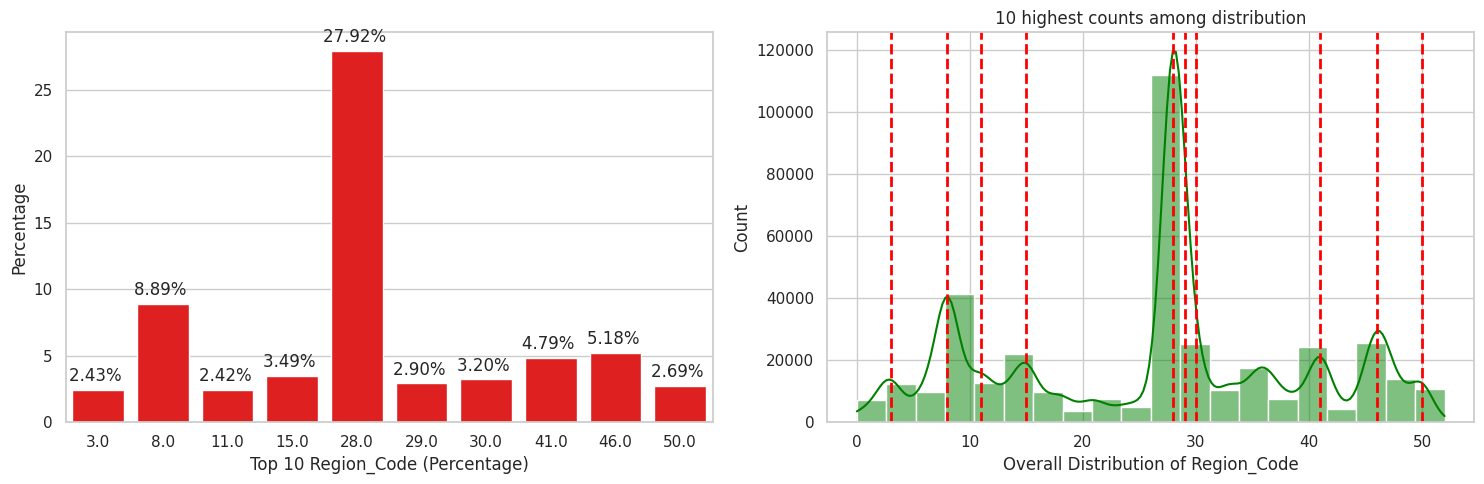

In [18]:
multi_cat_top10_and_distribution_plots(raw, 'Region_Code')

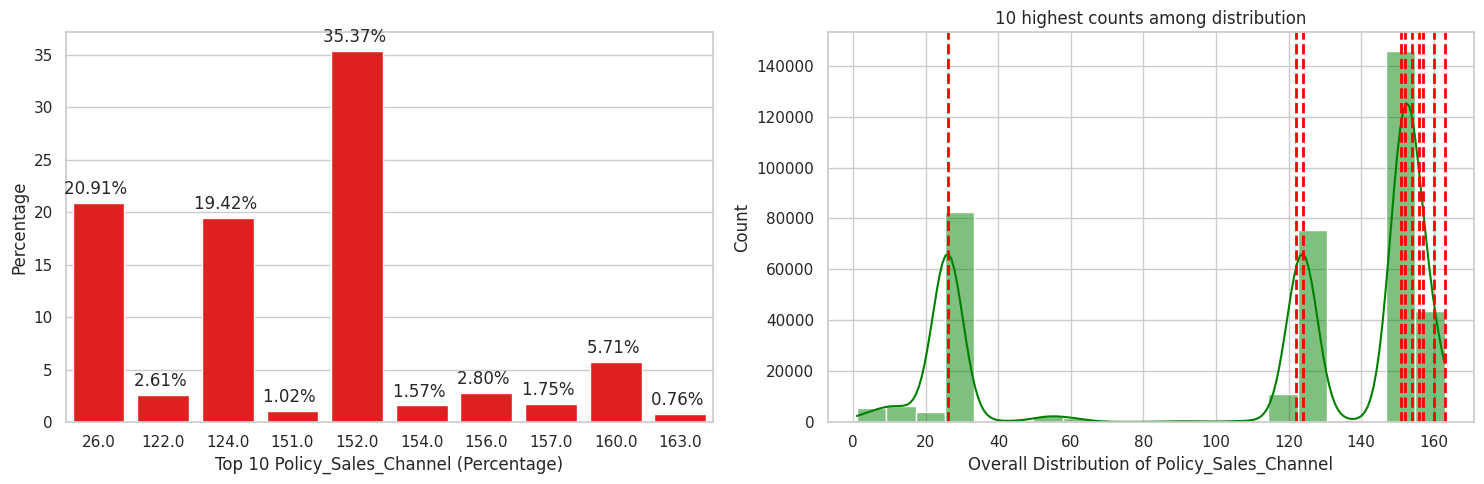

In [19]:
multi_cat_top10_and_distribution_plots(raw, 'Policy_Sales_Channel')

> Continuous : **Age , Vintage, Annual_Premium**

Since they are continuous data, we decided to increase the observers **from 10 to 20** aiming to refine the granularity of analysis

**Age** 

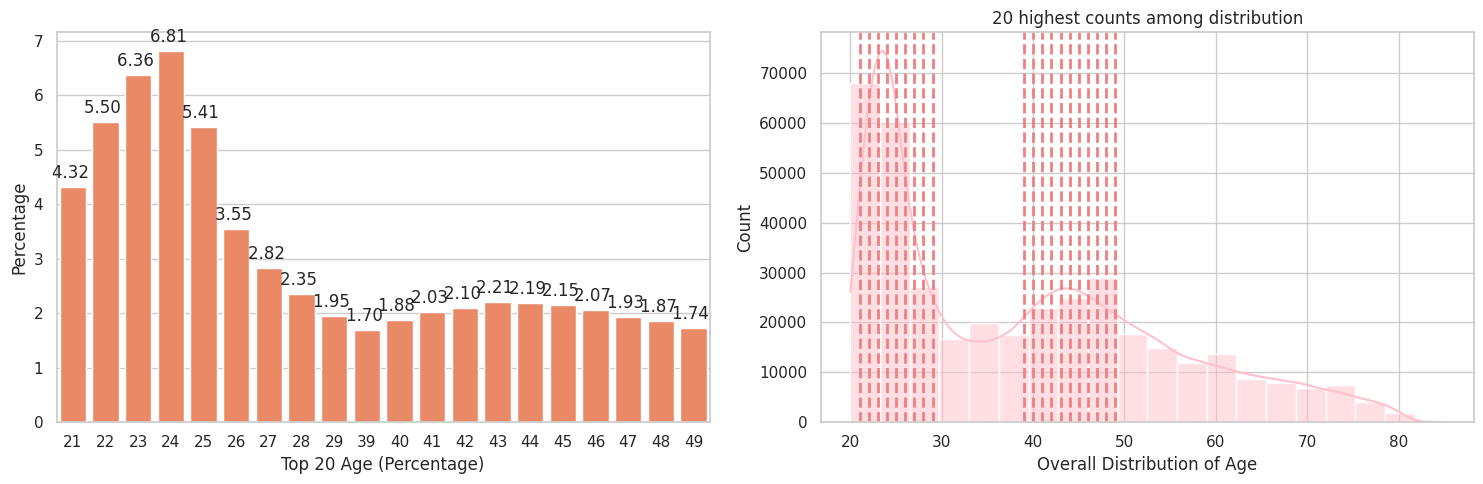

In [20]:
num_top20_and_distribution_plots(raw, 'Age')

> noted: Later in bivariate analysis, we would dig deeper to find whether customers who interested in vehicle insurance also has highest counts at Age 20-30 and then 40-50.

* **Box plot : Annual_Premium** 

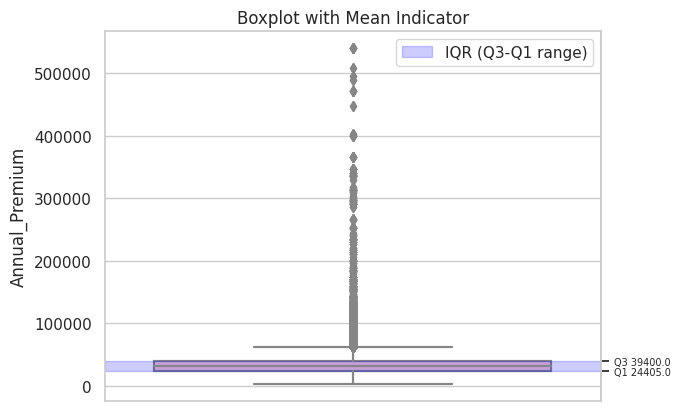

In [23]:
axes[0]
sns.boxplot(y = 'Annual_Premium', data = raw, color = 'pink')

axes[1]
ax = sns.boxplot(y ='Annual_Premium', data = raw, color = 'pink')
q1 = raw['Annual_Premium'].quantile(0.25)
q3 = raw['Annual_Premium'].quantile(0.75)

# Indicate the range between Q1 and Q3 on the y-axis
ax.axhspan(q1, q3, alpha=0.2, color='blue', label='IQR (Q3-Q1 range)')
# Add a secondary y-axis for quartiles
secax = ax.secondary_yaxis('right')
secax.set_yticks([q1, q3])
secax.set_yticklabels([f'Q1 {q1}', f'Q3 {q3}'],fontsize =7)

# Customize the plot
plt.title('Boxplot with Mean Indicator')
plt.legend()

# Show the plot
plt.show()

> from the presence of extreme values beyond the , **Annual_Premium** was clearly biased.
>
>Central 50% of the data is highly concentrated in the range of 24,405 and 39,400 which leading to a right-skewed distribution.
>
> extreme outliers compared to Q1 and Q3 value, could lead inaccuracies in predictive model

> 

**Catching-Up for Univariate Analysis :**
>  
> **Gender:** Over the half customers were male.
> 
> **Age:** The distribution of ages is clearly right-skewed, with peaks observed the most at 20-30, and then 40-50.
> 
> **Vehicle_Age:** Almost all customers' vehicles are less than 2 years old, and the top age group is 1-2 year
> 
> **Driving_License:** Nearly all customers (99.7%) possess a driver's license.
> 
> **Region_Code:**  Region Code 28 stands out significantly (27.92%). Two second highest regions each contribute less than 10%, while the majority of regions have customer count of less than 5%."
> 
> **Previously_Insured:** Over half of the customers have previously had vehicle insurance.
> 
> **Vehicle_Damage:** Approximately half of the customers have experienced vehicle damage, while the other half has not.
> 
> **Annual_Premium:** 75% of customers spend less than 40,000 USD, highly concentrated between about 25,000 and 40,000 USD which lead a right skewed distribution 
> 
> **Policy_Sales_Channel:** more than 75% of customers come from channels 152, 26, and 124 where a peak (35.37%) come from channel 152,
> 
> **Vintage:** The distribution seems equally spread and low of variation didn't give much information.                  

**"To gain a deeper perspective on behaviors and preferences in the context of vehicle insurance, we should explore how these features interact with one another."**

# Bivariate Analysis
* **Response based on Gender** :

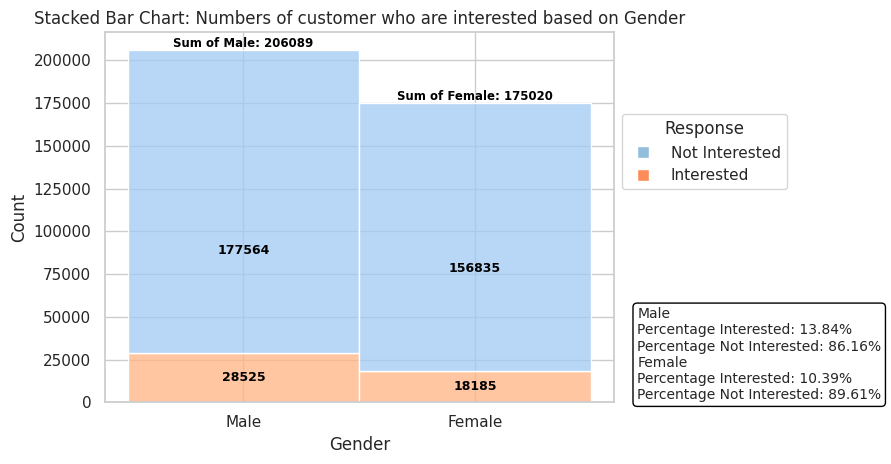

In [24]:
response_count = raw.groupby(['Gender', 'Response']).size().unstack('Response')
response_percentage = response_count.div(raw.groupby('Gender').size(), axis=0) * 100

# Extract percentages for interested (Response=1) and not interested (Response=0)
male_percentage_interested = response_percentage.loc['Male', 1]
male_percentage_not_interested = response_percentage.loc['Male', 0]

female_percentage_interested = response_percentage.loc['Female', 1]
female_percentage_not_interested = response_percentage.loc['Female', 0]
total_sum = raw.groupby(['Gender', 'Response']).size().unstack('Response').sum(axis=1)

sns.histplot(data=raw, x='Gender', hue='Response', multiple='stack', palette='pastel')

# Annotate each bar with the number of customers and percentage

for container in plt.gca().containers:
    for p in container.patches:
        height = p.get_height()
        width = p.get_width()
        x, y = p.get_xy()
        # Annotate percentage with normal fontweight below the count
        plt.gca().annotate(f'{int(height)}', (x + width / 2., height / 2),
                           ha='center', va='center', color='black', fontsize=9, fontweight='bold')

# Annotate each column (Gender) with the sum on top
gender_order = ['Male','Female']
for i, gender in enumerate(gender_order):
    total = total_sum.loc[gender]
    vertical_position = max(total_sum) + 10 if gender == 'Male' else total + 10
    plt.text(i, vertical_position, f'Sum of {gender}: {int(total)}', ha='center', va='bottom', color='black', fontsize=8.5, fontweight='bold')

# Adjusting layout
plt.title("Stacked Bar Chart: Numbers of customer who are interested based on Gender")
plt.tight_layout()

legend_entries = [
    Line2D([0], [0], marker='s', color='w', markerfacecolor='#91bfdb', markersize=8, label='Not Interested'),
    Line2D([0], [0], marker='s', color='w', markerfacecolor='#fc8d59', markersize=8, label='Interested')]

# Display legend
plt.legend(handles=legend_entries, title="Response", bbox_to_anchor =(1, 0.8))

# Add a text box with additional information
info_text = (
    "Male\nPercentage Interested: {:.2f}%\nPercentage Not Interested: {:.2f}%\n".format(
        male_percentage_interested, male_percentage_not_interested
    )
    + "Female\nPercentage Interested: {:.2f}%\nPercentage Not Interested: {:.2f}%".format(
        female_percentage_interested, female_percentage_not_interested
    )
)

plt.text(1.7, 1, info_text, bbox=dict(boxstyle="round", edgecolor="black", facecolor="white"), fontsize=10, verticalalignment="bottom")

# Show the plot
plt.show()

**Interpretation:**
> More male customers than female are interested in vehicle insurance. This pattern align **the same as the gender distribution of health insurance customers.**

* Numbers of **Driving License holder with Response**

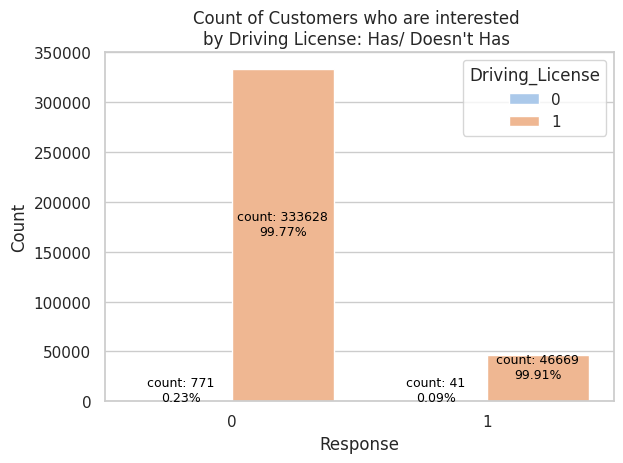

In [25]:
raw = raw.astype({"Driving_License": object, "Region_Code":object})
# Calculate the count and percentage of each response by gender
response_count = raw.groupby(['Response','Driving_License']).size().unstack('Driving_License')
response_percentage = response_count.div(raw.groupby('Response').size(), axis=0) * 100

# Reset the index for easier plotting
response_count = response_count.reset_index()
response_percentage = response_percentage.reset_index()

# Melt the DataFrames for seaborn plotting
response_count_melted = response_count.melt(id_vars='Response', var_name='Driving_License', value_name='Count')
response_percentage_melted = response_percentage.melt(id_vars='Response', var_name='Driving_License', value_name='Percentage')

sns.barplot(data=response_count_melted, x='Response', y='Count', hue='Driving_License', palette='pastel')

# Annotate each bar with both count and percentage
for i, p in enumerate(plt.gca().patches):
    height = p.get_height()
    percentage = response_percentage_melted['Percentage'].iloc[i]
    count = response_count_melted['Count'].iloc[i]
    plt.gca().annotate(f'count: {int(count)}\n{percentage:.2f}%', (p.get_x() + p.get_width() / 2., height / 2),
                       ha='center', va='baseline', color='black', fontsize=9)

# Set a title for the graph
plt.title("Count of Customers who are interested \nby Driving License: Has/ Doesn't Has ")

# Adjusting layout
plt.tight_layout()

# Show the plot
plt.show()

* **Interpretation :**
> it was very appropriate for the company to cross-sell vehicle insurance to these existing customers, as **99% of them are eligible drivers**.
>
> We should keep this in the predictive model since it related to our features associated with driving activities.

* **Response based on Age** 

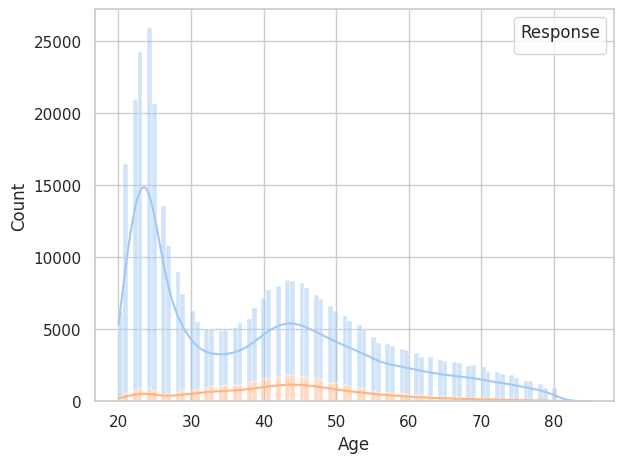

In [26]:
sns.histplot(data=raw, x='Age', hue='Response', multiple='stack',kde=True, palette='pastel')

# Displaying legend
plt.legend(title='Response', loc='upper right')

# Adjusting layout
plt.tight_layout()

# Show the plot
plt.show()

the distribution of customers who are interested seems equally spread to all age range, considering **age class segmentation** could be beneficial for our analysis 

> **Age Class segmentation**

**by Generation** 

> As each of generations has their owned specific behaviors, preferences and beliefs on purchasing, classifying them by generation could bring clearer insights such as their sales channels and their purchasing decisions

>  **Gen Z**      age: 20-27

>  **Millennials**   age: 28-43

>  **Gen X**        age: 44-59

>  **Boomers**       age: 60-78

>  **Post wars**      age: 79+'

source : [https://abmatic.ai/blog/benefits-of-segmenting-customers-by-age-and-generation
](http://) 
Examining generational differences can help tailor marketing campaigns, product offerings, and customer experiences to better resonate with each specific demographic, ultimately enhancing overall engagement and satisfaction.

In [27]:

#Generation segmentation Gen Z 20-27', 'Millennials 28-43', 'Gen X 44-59', 'Boomers 60-78', 'Post wars 79+'
bins = [20, 28, 44, 60, 79,85]
labels = ['Gen Z', 'Millennials', 'Gen X', 'Boomers', 'Post wars']
raw['Gen_Age'] =pd.cut(raw.Age , bins, labels = labels,include_lowest = True)
raw[['Age','Gen_Age']].head(5)

,Age,Gen_Age
0,44,Millennials
1,76,Boomers
2,47,Gen X
3,21,Gen Z
4,29,Millennials


Then, we visualize again with **Age_Class based on Response**

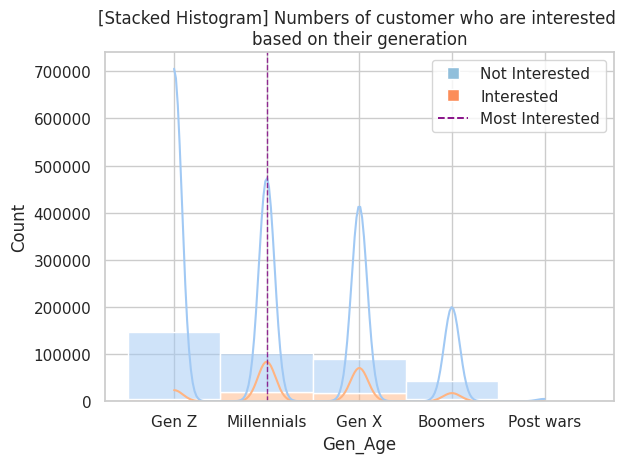

In [28]:
value_counts = raw[raw['Response'] == 1]['Gen_Age'].value_counts()
total_counts = len(raw)
top2_counts = value_counts.sort_values().tail(1)


sns.histplot(data=raw, x='Gen_Age', hue='Response', multiple='stack',kde=True, palette='pastel')
for val in top2_counts.index:
    plt.axvline(x=val, color='purple', linestyle='dashed', linewidth=1, alpha=0.8)  # Adjust color and linestyle

legend_entries = [
Line2D([0], [0], marker='s', color='w', markerfacecolor='#91bfdb', markersize=8, label='Not Interested'),
Line2D([0], [0], marker='s', color='w', markerfacecolor='#fc8d59', markersize=8, label='Interested'),
Line2D([0], [0], color='purple', linestyle='dashed', linewidth=1.3, alpha=1, label='Most Interested')]

plt.title("[Stacked Histogram] Numbers of customer who are interested \nbased on their generation")
# Display legend
plt.legend(handles=legend_entries, loc='upper right')
# Adjusting layout
plt.tight_layout()

# Show the plot
plt.show()

**Intrepretation:**
>  While the GenZ (aged 20-27)  have highest number among health insurance customers , they shows low of interest in vehicle insurance.
>
>The trends seems mid-aged people are our potential customers with **Millennials standing out as the most interested** then it would be Gen X. 

* **Response based on Vehicle_Age**

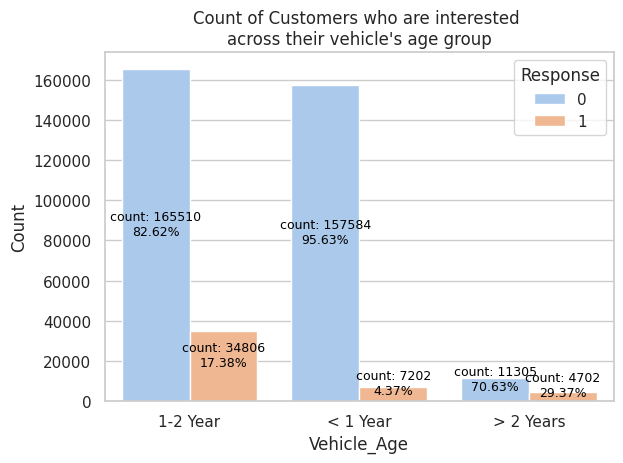

In [29]:
# Calculate the count and percentage of each response by gender
response_count = raw.groupby(['Vehicle_Age', 'Response']).size().unstack('Response')
response_percentage = response_count.div(raw.groupby('Vehicle_Age').size(), axis=0) * 100

# Reset the index for easier plotting
response_count = response_count.reset_index()
response_percentage = response_percentage.reset_index()

# Melt the DataFrames for seaborn plotting
response_count_melted = response_count.melt(id_vars='Vehicle_Age', var_name='Response', value_name='Count')
response_percentage_melted = response_percentage.melt(id_vars='Vehicle_Age', var_name='Response', value_name='Percentage')

sns.barplot(data=response_count_melted, x='Vehicle_Age', y='Count', hue='Response', palette='pastel')

# Annotate each bar with both count and percentage
for i, p in enumerate(plt.gca().patches):
    height = p.get_height()
    percentage = response_percentage_melted['Percentage'].iloc[i]
    count = response_count_melted['Count'].iloc[i]
    plt.gca().annotate(f'count: {int(count)}\n{percentage:.2f}%', (p.get_x() + p.get_width() / 2., height / 2),
                       ha='center', va='baseline', color='black', fontsize=9)

# Set a title for the graph
plt.title("Count of Customers who are interested \nacross their vehicle's age group")

# Adjusting layout
plt.tight_layout()

# Show the plot
plt.show()

**Interpretation:**
> This showed clear trend as a higher age of the vehicle is associated with a greater percentage of customers expressing interest in vehicle insurance.
> 
> While most of our existing customers has **vehicle aged 1-2 years.**

* **Response based on their vehicles' damage history (yes/no)**


In [30]:
response_count = raw.groupby(['Vehicle_Damage', 'Response']).size().unstack('Response')
response_percentage = response_count.div(raw.groupby('Vehicle_Damage').size(), axis=0) * 100

# Extract percentages for interested (Response=1) and not interested (Response=0)
yes_percentage_interested = response_percentage.loc['Yes', 1]
yes_percentage_not_interested = response_percentage.loc['Yes', 0]

no_percentage_interested = response_percentage.loc['No', 1]
no_percentage_not_interested = response_percentage.loc['No', 0]
total_sum = raw.groupby(['Vehicle_Damage', 'Response']).size().unstack('Response').sum(axis=1)

# Add a text box with additional information
info_text = (
    "Vehicle Damage: Yes\nPercentage Interested: {:.2f}%\nPercentage Not Interested: {:.2f}%\n".format(
        yes_percentage_interested, yes_percentage_not_interested
    )
    + "Vehicle Damage: No\nPercentage Interested: {:.2f}%\nPercentage Not Interested: {:.2f}%".format(
        no_percentage_interested, no_percentage_not_interested
    )
)




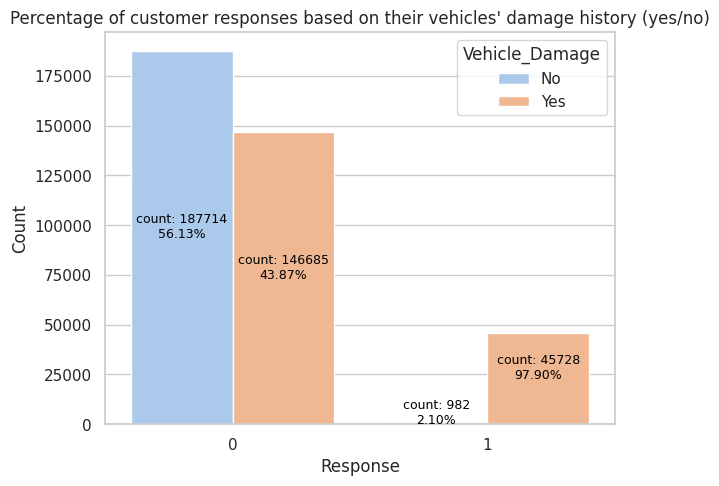

In [31]:

#inform upper chart

response_count_2 = raw.groupby(['Response', 'Vehicle_Damage']).size().unstack('Vehicle_Damage')
response_percentage_2 = response_count_2.div(raw.groupby('Response').size(), axis=0) * 100

response_count_2 = response_count_2.reset_index()
response_percentage_2 = response_percentage_2.reset_index()

response_count_melted_2 = response_count_2.melt(id_vars='Response', var_name='Vehicle_Damage', value_name='Count')
response_percentage_melted_2 = response_percentage_2.melt(id_vars='Response', var_name='Vehicle_Damage', value_name='Percentage')

# Seaborn bar plot
sns.barplot(data=response_count_melted_2, x='Response', y='Count', hue='Vehicle_Damage', palette='pastel')

# Annotate each bar with both count and percentage
for i, p in enumerate(plt.gca().patches):
    height = p.get_height()
    percentage = response_percentage_melted_2['Percentage'].iloc[i]
    count = response_count_melted_2['Count'].iloc[i]
    plt.gca().annotate(f'count: {int(count)}\n{percentage:.2f}%', (p.get_x() + p.get_width() / 2., height / 2),
                       ha='center', va='baseline', color='black', fontsize=9)

# Adjusting layout
plt.tight_layout()

# Display the first information text on the right side of the chart
plt.title("Percentage of customer responses based on their vehicles' damage history (yes/no)")
plt.show()


**Intrepretation:**
> Entire the customer who are interested in vehicle insurance (97.90%) have experienced damage to their cars. So, the customers **who ever got their car damaged** would be interested in our vehicle insurance 

* **Vehicle_Age based on Vehicle Damage**

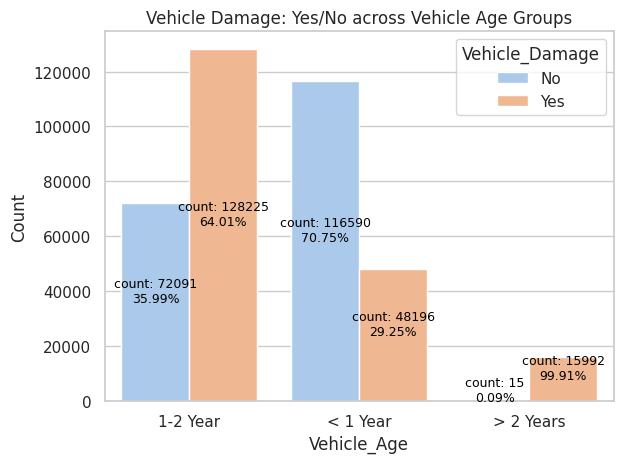

In [32]:
#เทพ
# Calculate the count and percentage of each response by gender
response_count = raw.groupby(['Vehicle_Age', 'Vehicle_Damage']).size().unstack('Vehicle_Damage')
response_percentage = response_count.div(raw.groupby('Vehicle_Age').size(), axis=0) * 100

# Reset the index for easier plotting
response_count = response_count.reset_index()
response_percentage = response_percentage.reset_index()

# Melt the DataFrames for seaborn plotting
response_count_melted = response_count.melt(id_vars='Vehicle_Age', var_name='Vehicle_Damage', value_name='Count')
response_percentage_melted = response_percentage.melt(id_vars='Vehicle_Age', var_name='Vehicle_Damage', value_name='Percentage')

sns.barplot(data=response_count_melted, x='Vehicle_Age', y='Count', hue='Vehicle_Damage', palette='pastel')

# Annotate each bar with both count and percentage
for i, p in enumerate(plt.gca().patches):
    height = p.get_height()
    percentage = response_percentage_melted['Percentage'].iloc[i]
    count = response_count_melted['Count'].iloc[i]
    plt.gca().annotate(f'count: {int(count)}\n{percentage:.2f}%', (p.get_x() + p.get_width() / 2., height / 2),
                       ha='center', va='baseline', color='black', fontsize=9)

# Set a title for the graph
plt.title("Vehicle Damage: Yes/No across Vehicle Age Groups")

# Adjusting layout
plt.tight_layout()

# Show the plot
plt.show()

**Intrepretation:**
> Customers who owned an older car have clearly higher the chance of damage. The chart suggests that the age of the vehicle can be a classifier for the probability of experiencing damage since, **there are significant correlation between vehicle age and vehicle damage's history**

Now, we have information from the customers who are interested based on:
> **Gender** : male customers show more interest in our vehicle insurance
>
> **Age class** : Millennials and Gen X are the majority of interested customers 
>
> **Vehicle Age** : most of interested customers are in 1-2 year vehicle age group, trend showed higher age of vehicle come with greater percentage of interested
>
> **Vehicle Damage** : The customers who ever got their car damaged would be interested in our vehicle insurance. More of **Vehicle age** showed more probability of damage
>


* **customer's vehicle age group across their generation.**

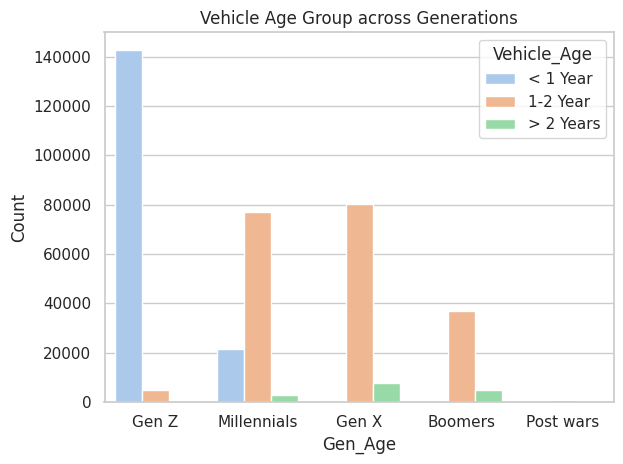

In [33]:
# Calculate the count and percentage of each response by generation and vehicle age
response_count = raw.groupby(['Gen_Age', 'Vehicle_Age']).size().unstack('Vehicle_Age')
response_percentage = response_count.div(raw.groupby('Gen_Age').size(), axis=0) * 100

# Reset the index for easier plotting
response_count = response_count.reset_index()
response_percentage = response_percentage.reset_index()

# Melt the DataFrames for seaborn plotting
response_count_melted = response_count.melt(id_vars='Gen_Age', var_name='Vehicle_Age', value_name='Count')
response_percentage_melted = response_percentage.melt(id_vars='Gen_Age', var_name='Vehicle_Age', value_name='Percentage')
order = ['< 1 Year', '1-2 Year', '> 2 Years']

# Plotting the bar chart
sns.barplot(data=response_count_melted, x='Gen_Age', y='Count', hue='Vehicle_Age', hue_order=order, palette='pastel')

# Set a title for the graph
plt.title("Vehicle Age Group across Generations")

# Adjusting layout
plt.tight_layout()

# Show the plot
plt.show()

* **Intrepretation :**
> Nearly all of **Gen Z** has less than 1 year vehicle age, while none of them has a vehicle aged more than 2 years.
>
> Majority of customers who has vehicle aged 1-2 year are **Millenials and Gen X** 
>

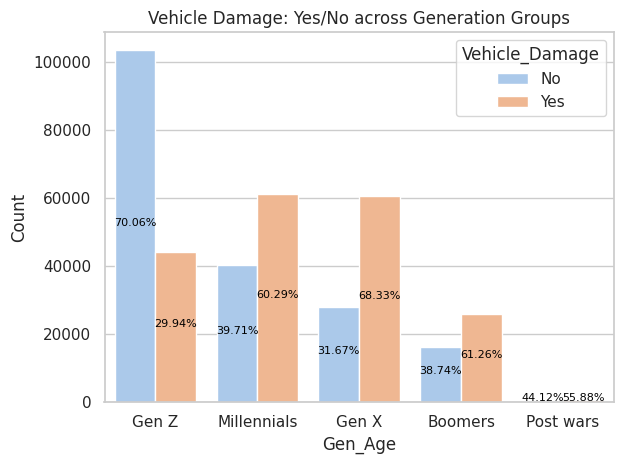

In [34]:
response_count = raw.groupby(['Gen_Age', 'Vehicle_Damage']).size().unstack('Vehicle_Damage')
response_percentage = response_count.div(raw.groupby('Gen_Age').size(), axis=0) * 100

# Reset the index for easier plotting
response_count = response_count.reset_index()
response_percentage = response_percentage.reset_index()

# Melt the DataFrames for seaborn plotting
response_count_melted = response_count.melt(id_vars='Gen_Age', var_name='Vehicle_Damage', value_name='Count')
response_percentage_melted = response_percentage.melt(id_vars='Gen_Age', var_name='Vehicle_Damage', value_name='Percentage')

sns.barplot(data=response_count_melted, x='Gen_Age', y='Count', hue='Vehicle_Damage', palette='pastel')

# Annotate each bar with both count and percentage
for i, p in enumerate(plt.gca().patches):
    height = p.get_height()
    percentage = response_percentage_melted['Percentage'].iloc[i]
    count = response_count_melted['Count'].iloc[i]
    plt.gca().annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., height / 2),
                       ha='center', va='baseline', color='black', fontsize=8)

# Set a title for the graph
plt.title("Vehicle Damage: Yes/No across Generation Groups")

# Adjusting layout
plt.tight_layout()

# Show the plot
plt.show()

* **Intrepretation :**
>  Both of **Millennials and Gen X** have higher percentage on vehicle damage experiences, while 70% of Gen Z have non-damaged vehicle 

**Catching up**
> Almost of **Millennials and Gen X**  has slightly older vehicles that are more prone to damage while majority of **Gen Z** tends to possess newer and non-damaged vehicles.
>
>There are notable presences of male customers who aged over 30 which are **Millennials, Gen X and boomers** as interested customers

This breakdown simplifies our understanding the correlation of **Age, Gender, Vehicle Age and damage history**,  

* **Response based on Previously_Insured**

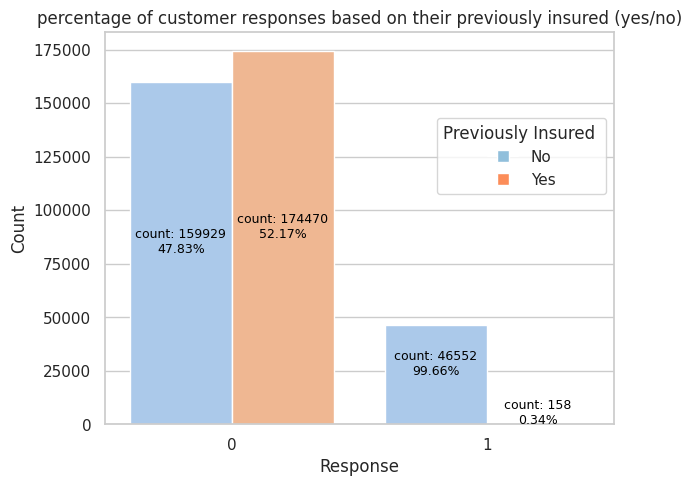

In [36]:
#inform upper chart

response_count_2 = raw.groupby(['Response', 'Previously_Insured']).size().unstack('Previously_Insured')
response_percentage_2 = response_count_2.div(raw.groupby('Response').size(), axis=0) * 100

response_count_2 = response_count_2.reset_index()
response_percentage_2 = response_percentage_2.reset_index()

response_count_melted_2 = response_count_2.melt(id_vars='Response', var_name='Previously_Insured', value_name='Count')
response_percentage_melted_2 = response_percentage_2.melt(id_vars='Response', var_name='Previously_Insured', value_name='Percentage')

# Seaborn bar plot
sns.barplot(data=response_count_melted_2, x='Response', y='Count', hue='Previously_Insured', palette='pastel')

# Annotate each bar with both count and percentage
for i, p in enumerate(plt.gca().patches):
    height = p.get_height()
    percentage = response_percentage_melted_2['Percentage'].iloc[i]
    count = response_count_melted_2['Count'].iloc[i]
    plt.gca().annotate(f'count: {int(count)}\n{percentage:.2f}%', (p.get_x() + p.get_width() / 2., height / 2),
                       ha='center', va='baseline', color='black', fontsize=9)
legend_entries = [
    Line2D([0], [0], marker='s', color='w', markerfacecolor='#91bfdb', markersize=8, label='No'),
    Line2D([0], [0], marker='s', color='w', markerfacecolor='#fc8d59', markersize=8, label='Yes')]

plt.legend(handles=legend_entries, title="Previously Insured ", bbox_to_anchor =(1, 0.8))

# Adjusting layout
plt.tight_layout()

# Display the first information text on the right side of the chart
plt.title("percentage of customer responses based on their previously insured (yes/no)")
plt.show()



* **Intrepretation :**
> 99% of customers expressing interest in our vehicle insurance **do not have existing coverage for their vehicles.**

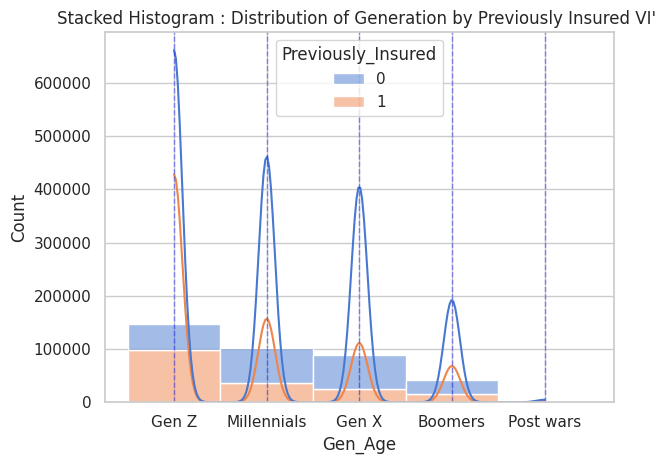

In [37]:
# Get value counts for Region_Code
value_counts = raw['Gen_Age'].value_counts()
total_counts = len(raw)
top10_counts = value_counts.sort_values().tail(10)

sns.histplot(data=raw, x='Gen_Age',hue='Previously_Insured',multiple='stack' , palette="muted",kde=True)
# Plot dashed lines for the top 10 regions with a different color
for val in top10_counts.index:
    plt.axvline(x=val, color='blue', linestyle='dashed', linewidth=1, alpha=0.4)  # Adjust color and linestyle

plt.title("Stacked Histogram : Distribution of Generation by Previously Insured VI' ")
# Adjusting layout
plt.tight_layout()

# Show the plot
plt.show()

* **Intrepretation :**
> Majority of **Millennials and Gen X customers**, haven't had previous insured while most Gen Z have already had it. 

* **Response based on Region Code**

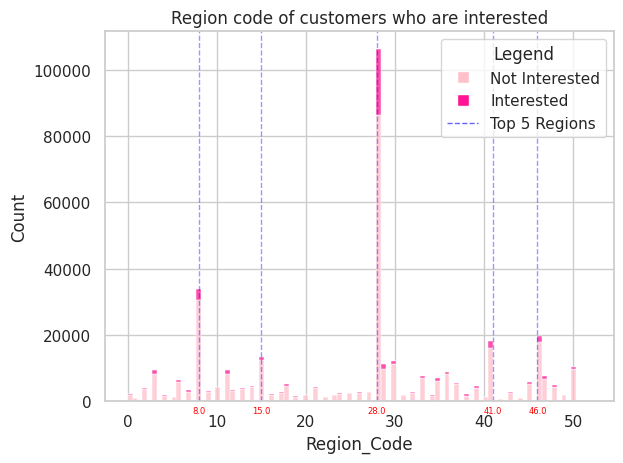

In [38]:
order = [1,0]
custom= ['deeppink','pink']
sns.histplot(data=raw, x='Region_Code', hue='Response',hue_order = order, multiple='stack', palette=custom)

# Get value counts for Region_Code
value_counts = raw['Region_Code'].value_counts()
total_counts = len(raw)
top5_counts = value_counts.sort_values().tail(5)

# Plot dashed lines for the top 5 regions with a different color
for val in top5_counts.index:
    plt.axvline(x=val, color='blue', linestyle='dashed', linewidth=1, alpha=0.4)  # Adjust color and linestyle

for val in top5_counts.index:
    plt.text(val, -1500, f'{val}', color='red', ha='center', va='top', fontsize=6)

legend_entries = [
    Line2D([0], [0], marker='s', color='w', markerfacecolor='pink', markersize=8, label='Not Interested'),
    Line2D([0], [0], marker='s', color='w', markerfacecolor='deeppink', markersize=8, label='Interested'),
    Line2D([0], [0], color='blue', linestyle='dashed', linewidth=1, alpha=0.6, label='Top 5 Regions')  # Custom entry for the top 10 regions
]

# Display legend
plt.legend(handles=legend_entries, title='Legend', loc='upper right')
plt.title("Region code of customers who are interested")
# Adjusting layout
plt.tight_layout()

# Show the plot
plt.show()

* **Interpretation :**
> Almost of interested customers come from this area where they has highest numbers of existing customer ( We indicate top 5 regions)

 * We also looking on **Region code** by the percentage of **vehicle damaged** and then **by generation**

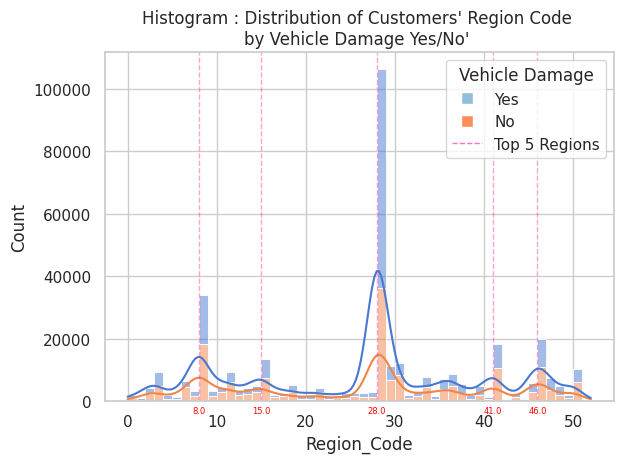

In [39]:
# Get value counts for Region_Code
value_counts = raw['Region_Code'].value_counts()
total_counts = len(raw)
top5_counts = value_counts.sort_values().tail(5)

sns.histplot(data=raw, x='Region_Code',hue='Vehicle_Damage' ,bins= 52,multiple='stack', palette="muted",kde=True)
# Plot dashed lines for the top 5 regions with a different color
for val in top5_counts.index:
    plt.axvline(x=val, color='deeppink', linestyle='dashed', linewidth=1, alpha=0.4)  # Adjust color and linestyle
# Annotate x-axis with region codes for the top 5 values
for val in top5_counts.index:
    plt.text(val, -1500, f'{val}', color='red', ha='center', va='top', fontsize=6)

plt.title("Histogram : Distribution of Customers\' Region Code \nby Vehicle Damage Yes/No' ")
legend_entries = [
    Line2D([0], [0], marker='s', color='w', markerfacecolor='#91bfdb', markersize=8, label='Yes'),
    Line2D([0], [0], marker='s', color='w', markerfacecolor='#fc8d59', markersize=8, label='No'),
    Line2D([0], [0], color='deeppink', linestyle='dashed', linewidth=1, alpha=0.6, label='Top 5 Regions')  # Custom entry for the top 10 regions
]

# Display legend
plt.legend(handles=legend_entries, title="Vehicle Damage", loc='upper right')

# Adjusting layout
plt.tight_layout()

# Show the plot
plt.show()

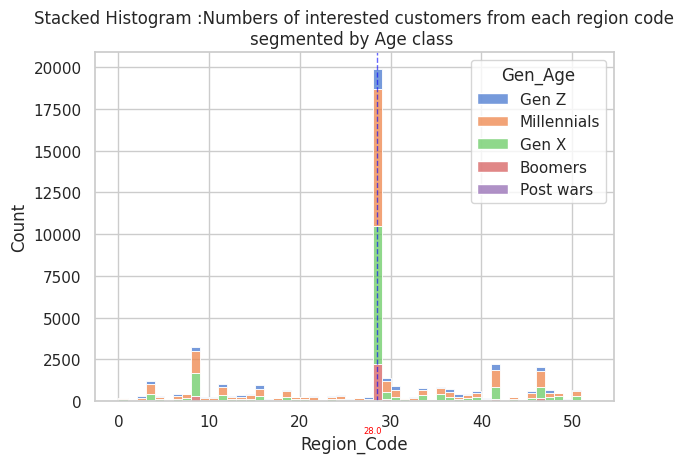

In [40]:
 response_1 = raw[raw['Response'] ==1]


# Get value counts
value_counts = raw[raw['Response'] ==1]['Region_Code'].value_counts()
total_counts = len(response_1_data)
top_counts = value_counts.sort_values().tail(1)

sns.histplot(data=response_1, x='Region_Code',hue='Gen_Age' ,bins= 52,multiple='stack', palette="muted")

for val, count in zip(top_counts.index, top_counts.values):
    # Calculate bar center
    bar_center = val + 0.5  # Assuming the bars are centered at integer values
    
    # Adjust the position of the blue dashed line to the bar center
    plt.axvline(x=bar_center, color='blue', linestyle='dashed', linewidth=1, alpha=0.6)
    
    plt.text(val, -1500, f'{val}', color='red', ha='center', va='top', fontsize=6)

plt.title("Stacked Histogram :Numbers of interested customers from each region code\nsegmented by Age class ")

# Adjusting layout
plt.tight_layout()
# Show the plot
plt.show()

* **Interpretation :**  All regions with the high amounts of interested customers are **mostly Millennials and Gen X customer-based**

we should prioritize **Region Code 28** as company's number one target area
> * highest numbers of interested customers  
> * highest percentage of vehicle's damage
> * highest concentrated of **Millennials and Gen X**


* **Response based on Policy Sales Channels**

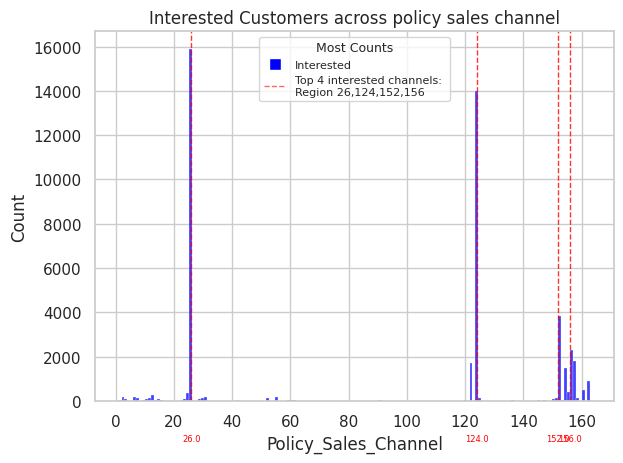

In [41]:
response_1_data = raw[raw['Response'] ==1]

order = [1,0]
custom= ['blue','coral']
# Get value counts
value_counts = raw[raw['Response'] ==1]['Policy_Sales_Channel'].value_counts()
total_counts = len(response_1_data)

sns.histplot(data=response_1_data, x='Policy_Sales_Channel', hue='Response',hue_order= order,bins=160, multiple='stack', palette=custom)


top4_counts = value_counts.sort_values().tail(4)

for val in top4_counts.index:
    plt.axvline(x=val, color='red', linestyle='dashed', linewidth=1, alpha=0.8)  

for val in top4_counts.index:
    plt.text(val, -1500, f'{val}', color='red', ha='center', va='top', fontsize=6)

legend_entries = [
    Line2D([0], [0], marker='s', color='w', markerfacecolor='blue', markersize=8, label='Interested'),
    Line2D([0], [0], color='red', linestyle='dashed', linewidth=1, alpha=0.6, label='Highest numbers of interested ')  # Custom entry for the top 10 regions
# Custom entry for the top 10 regions
]

# Display legend
plt.legend(handles=legend_entries, title='Counts', loc='upper center',fontsize=7.5)
plt.title("Interested Customers across policy sales channel")
legend_entries = [
    Line2D([0], [0], marker='s', color='w', markerfacecolor='blue', markersize=8, label='Interested'),
    Line2D([0], [0], color='red', linestyle='dashed', linewidth=1, alpha=0.6, label='Top 4 interested channels: \nRegion 26,124,152,156')
]

# Display legend
plt.legend(handles=legend_entries, title='Most Counts', loc='upper center', fontsize=8, title_fontsize=9)

# Adjusting layout
plt.tight_layout()

# Show the plot
plt.show()


* **Interpretation :**
> Almost interested customers come from **channel 26,124 ,152 and 156.**

> * We also looking on **Policy Sales Channels** with proportion of customers' **age and gender**.

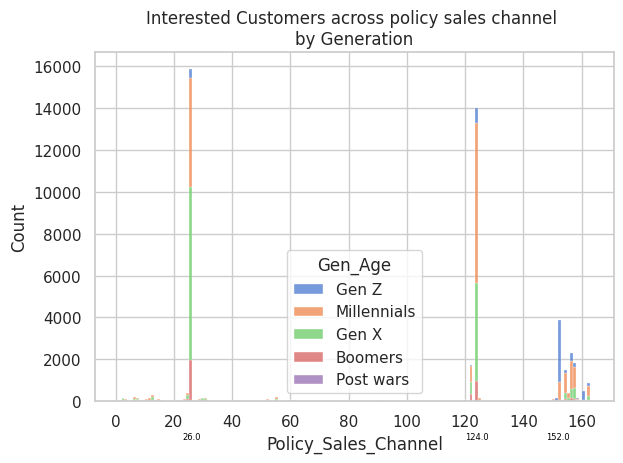

In [42]:
response_1_data = raw[raw['Response'] ==1]
value_counts = response_1_data['Policy_Sales_Channel'].value_counts()
total_counts = len(response_1_data)
top3_counts = value_counts.sort_values().tail(3)

sns.histplot(data=response_1_data, x='Policy_Sales_Channel',hue='Gen_Age' ,bins= 160,multiple='stack', palette="muted")

for val in top3_counts.index:
    plt.text(val, -1500, f'{val}', color='black', ha='center', va='top', fontsize=6)

plt.title("Interested Customers across policy sales channel \nby Generation")
# Display legend

# Adjusting layout
plt.tight_layout()
# Show the plot
plt.show()

* **Interpretation :** we should prioritize **Sales Channel 26, 124** as channels suited our potential customers
> * highest numbers of interested customers  
> * highest concentrated of **Millennials and Gen X**

**Channel 152** : which attract almost of **Gen Z** who are interested. In contrast, it can't approach any of Boomers and gen X.

This might be channel designed for those who enjoy digital experiences.

> > ***

**Target Customer Personas for cross-selling vehicle insurance**
# EDA Summary:
> **Customer Personas**
> - eligible-driver
> - Millennials and Gen X
> - Male
> - have never had previously vehicle insurance
> - experienced damage to their vehicle
> - vehicle aged more than 1 year
> - spends between USD 24,405 and USD 39,400 for annual premiums

>**Potential Channels and Areas for Engagement**:
> - Policy_Sales_Channel: 26, 124 
> - Region_Code: 28
***

: 
# 1) Modelling :Data Preprocessing

We start over with :
* re-import dataset (train.csv)
* Feature Encoding

Train Test Split Strategy:

**Data splitting train/ test 80: 20  and Stratified KFold for tuning the train set**

In [806]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
sns.set(style='whitegrid')
raw = pd.read_csv("/Users/joesrwt/Desktop/sip 2025 joee/cross sell prediction/train.csv")

In [808]:
raw.drop(columns=['id'], inplace=True)

# Features Encoding:

* after cleaning the data, we would encoding features into numerical

In [810]:
ordinal_col=['Gender','Driving_License','Previously_Insured','Vehicle_Damage', 'Vehicle_Age', 'Gen_Age']
ohe_col = [ 'Policy_Sales_Channel', 'Region_Code'] # one hot code
num_col=['Age','Annual_Premium','Vintage']

**Ordinal Encoder** : Gen_Age, Vehicle_Age : as their trends increase and decrease ordinally 

**One Hot Encoder** : 'Region_Code', 'Policy_Sales_Channel' 

In [812]:
raw.loc[raw['Gender'] == 'Male', 'Gender'] = 1
raw.loc[raw['Gender'] == 'Female', 'Gender'] = 0

raw.loc[raw['Vehicle_Damage'] == 'Yes', 'Vehicle_Damage'] = 1
raw.loc[raw['Vehicle_Damage'] == 'No', 'Vehicle_Damage'] = 0

raw.loc[raw['Vehicle_Age'] == '< 1 Year', 'Vehicle_Age'] = 0
raw.loc[raw['Vehicle_Age'] == '1-2 Year', 'Vehicle_Age'] = 1
raw.loc[raw['Vehicle_Age'] == '> 2 Years', 'Vehicle_Age'] = 2

In [814]:
bins = [20, 28, 44, 60, 79,85]
#labels = ['Gen Z', 'Millennials', 'Gen X', 'Boomers', 'Post wars']
labels = [0,1,2,3,4]
raw['Gen_Age'] =pd.cut(raw.Age , bins, labels = labels,include_lowest = True)
raw[['Age','Gen_Age']].head(5)

,Age,Gen_Age
0,44,1
1,76,3
2,47,2
3,21,0
4,29,1


**One Hot Encoder** : 'Region_Code', 'Policy_Sales_Channel'

In [816]:
ohe_encoder = OneHotEncoder( sparse_output=False)  # sparse_output=False gives a dense matrix

# Fit the OneHotEncoder on the training data and transform it
ohe_train_dense = ohe_encoder.fit_transform(raw[ohe_col])

# Convert the dense matrix to a DataFrame for the training set
ohe_train_df = pd.DataFrame(ohe_train_dense, columns=ohe_encoder.get_feature_names_out(ohe_col), index=raw.index)

# Drop the original columns and concatenate the One-Hot encoded features to X_train
raw_encoded = raw.drop(columns=ohe_col)
raw_encoded = pd.concat([raw_encoded, ohe_train_df], axis=1)

In [817]:
raw_encoded

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage,Response,Gen_Age,...,Region_Code_43.0,Region_Code_44.0,Region_Code_45.0,Region_Code_46.0,Region_Code_47.0,Region_Code_48.0,Region_Code_49.0,Region_Code_50.0,Region_Code_51.0,Region_Code_52.0
0,1,44,1,0,2,1,40454.0,217,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,76,1,0,1,0,33536.0,183,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,47,1,0,2,1,38294.0,27,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,21,1,1,0,0,28619.0,203,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,29,1,1,0,0,27496.0,39,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,1,74,1,1,1,0,30170.0,88,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
381105,1,30,1,1,0,0,40016.0,131,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
381106,1,21,1,1,0,0,35118.0,161,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
381107,0,68,1,0,2,1,44617.0,74,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Train Test Split

Splitting into train (80%) and test (20%) while stratifying by 'Response'

In [926]:
from sklearn.model_selection import train_test_split

X = raw_encoded.drop(columns=['Response'])  # Features
y = raw_encoded['Response']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Recombine into DataFrames
train_df = X_train.copy()
train_df['Response'] = y_train

test_df = X_test.copy()
test_df['Response'] = y_test

In [927]:
train_df

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage,Gen_Age,Policy_Sales_Channel_1.0,...,Region_Code_44.0,Region_Code_45.0,Region_Code_46.0,Region_Code_47.0,Region_Code_48.0,Region_Code_49.0,Region_Code_50.0,Region_Code_51.0,Region_Code_52.0,Response
274710,1,22,1,0,0,1,25455.0,203,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
216539,0,26,1,1,0,0,38393.0,45,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
78983,0,32,1,0,0,1,32118.0,35,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
218368,1,32,1,0,0,1,37711.0,215,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
307215,0,24,1,0,0,1,48706.0,222,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378816,1,25,1,1,0,1,23010.0,58,0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
67726,1,69,1,0,1,1,31630.0,290,3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
91744,1,24,1,0,0,0,59094.0,62,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
48700,0,40,1,1,1,0,28940.0,262,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


Remove outliers from train_df using IQR or Z-score, then apply the same to test_df.

In [931]:
import pandas as pd
import numpy as np

def remove_outliers_iqr(train_df, test_df, columns):
    # Compute IQR for train_df
    Q1 = train_df[columns].quantile(0.25)
    Q3 = train_df[columns].quantile(0.75)
    IQR = Q3 - Q1
    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter train_df based on IQR
    train_filtered = train_df[
        ~((train_df[columns] < lower_bound) | (train_df[columns] > upper_bound)).any(axis=1)]

    # Apply the same filtering criteria to test_df
    test_filtered = test_df[
        ~((test_df[columns] < lower_bound) | (test_df[columns] > upper_bound)).any(axis=1)]
    return train_filtered, test_filtered

# Example usage:
num_col=['Age','Annual_Premium','Vintage']
train_df_filtered, test_df_filtered = remove_outliers_iqr(train_df, test_df, num_col)


then, we'll use train_df_filtered to perform feature selections

In [934]:
len(train_df_filtered),len(test_df_filtered)

(296607, 74282)

In [936]:
X_train = train_df_filtered.drop(columns=['Response'])  # Features
Y_train = train_df_filtered['Response']  # Target variable

In [938]:
X_test = test_df_filtered.drop(columns=['Response'])  # Features
Y_test = test_df_filtered['Response']  # Target variable

# Feature Selection
* **EDA insights** comparing with **Pearson correlation and select KBest mutual info classif**

In [838]:
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
    ('standard_scaler', StandardScaler()),  # Scale features with StandardScaler
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, X_train.columns),])

full_pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Apply preprocessing
])

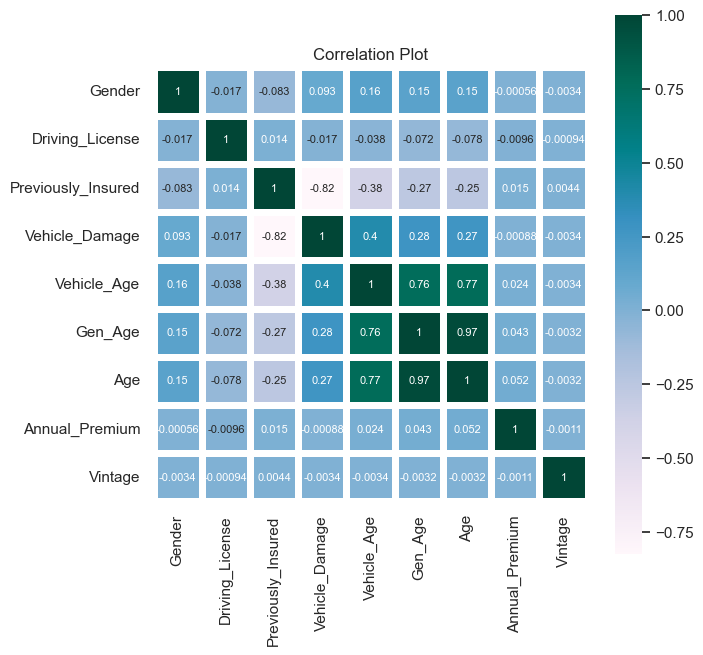

In [658]:
columns = ordinal_col+ num_col
#Pearson correlation heat map
plt.figure(figsize=(7, 7))
plt.title("Correlation Plot")
sns.heatmap(train_df_filtered[columns].corr(), linewidths=5, annot=True, square=True, annot_kws={'size': 8}, cmap='PuBuGn')
plt.show()

* **Select KBest method** 

for Classification
[**"mutual_info_classif"**](http://medium.com/@Kavya2099/optimizing-performance-selectkbest-for-efficient-feature-selection-in-machine-learning-3b635905ed48) is adept at handling a mix of categorical and numerical variables.

In [844]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif

# Apply the pipeline to transform X_train
X_train_processed = full_pipeline.fit_transform(X_train)

# Calculate the MI scores using mutual_info_classif or mutual_info_regression
mi_scores = mutual_info_classif(X_train_processed, Y_train)

# Create a DataFrame with feature names and their MI scores
mi_scores_df = pd.DataFrame({'Feature': X_train.columns, 'MI Score': mi_scores})

# Sort the DataFrame by MI score in descending order and get the top 12 features
top_12_mi_scores = mi_scores_df.sort_values(by='MI Score', ascending=False).head(12)

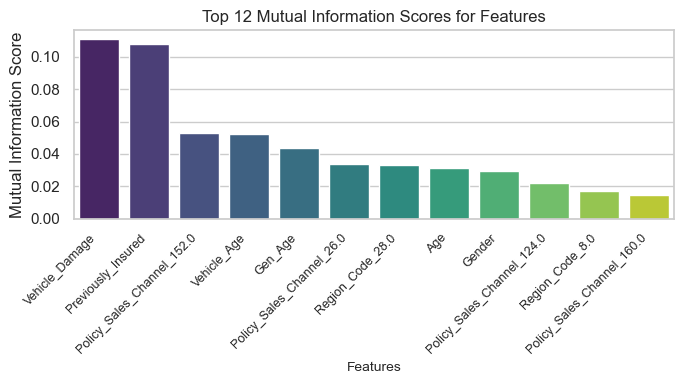

In [851]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 4))
sns.barplot(x=top_12_mi_scores['Feature'], y=top_12_mi_scores['MI Score'], 
            hue=top_12_mi_scores['Feature'], palette="viridis")

# Customize the plot
plt.title("Top 12 Mutual Information Scores for Features")
plt.xlabel("Features", fontsize=10)
plt.ylabel("Mutual Information Score")
plt.xticks(rotation=45, ha="right", fontsize=9)

# Show the plot
plt.tight_layout()
plt.show()


Interesting Features to keep     
>  **Gen_Age, Previously_Insured, Vehicle_Damage** : have some clear trends which captured potential customers in their ways :

> Policy_Sales_Channels : As top 4 channels attracted mainly Millennials and Gen X, and **Sales Channel 152** also bring notable interest from Gen Z customers.        Some


features were dropped    

> **Vintage and Annual_Premium**   as them seems very low correlation with other features including the target variable, didn't contribute any notable patterns of data.

> **Some class from Region_Code and Policy_Sales_Channels** , :   redundancy we can say that the potentials areas are almost relied on Millennials and Gen X which are our potential customers.       


After considering with EDA, correlations and mutual information using mutual_info_classif, we have firstly selected 8 features :
* 1) **Vehicle_Damage**
* 2) **Previously_Insured**
* 3) **Policy_Sales_Channel_152.0**
* 4) **Vehicle_Age**
* 5) **Gen_Age**
* 6) **Policy_Sales_Channel_26.0**
* 7) **Region_Code_28.0**
* 8) **Age**

In [1178]:
kbest = ['Vehicle_Damage', 'Previously_Insured',
       'Policy_Sales_Channel_152.0', 'Vehicle_Age', 'Gen_Age',
       'Policy_Sales_Channel_26.0', 'Region_Code_28.0', 'Age']

# **Modeling and Evaluation :**

We split 80% for training the data for test and the rest of 20% for testing.And we need to use 'stratify' in train_test_split to maintain class proportions due to imbalance dataset.

## Predictive Modelling Steps

1. **Training set**
  >- Tuning using Stratified KFold cross-validation to split data while maintaining class balance.  
  >- build a **pipeline to avoid data leakage** by preprocessing separately within each training fold.  

2. **Algorithm Selection**
   
   >- Baseline with **low-complexity models**: Decision Tree.  
   >- **ensemble methods**: Random Forest 
   >- **boosting techniques**: CatBoost for complex patterns.

     
4. **Evaluation metrics** : F1 and Recall


5. **Hyperparameter Tuning**  
   > using Randomized Search with cross validation


6. **Model Explainability and Conclusion**  
   >- Testing score on the test set and Analyze feature contributions with the final model 

In [940]:
X_train_selected = X_train[kbest]
X_test_selected = X_test[kbest]

In [944]:
X_train_selected.to_csv('/Users/joesrwt/Desktop/sip 2025 joee/UOB SIP/X_train_selected.csv', index=False)
Y_train.to_csv('/Users/joesrwt/Desktop/sip 2025 joee/UOB SIP/Y_train.csv', index=False)
X_test_selected.to_csv('/Users/joesrwt/Desktop/sip 2025 joee/UOB SIP/X_test_selected.csv', index=False)
Y_test.to_csv('/Users/joesrwt/Desktop/sip 2025 joee/UOB SIP/Y_test.csv', index=False)

# Pipeline for Modelling

In [977]:
import pandas as pd

X_train_selected = pd.read_csv('/Users/joesrwt/Desktop/sip 2025 joee/UOB SIP/X_train_selected.csv')
Y_train = pd.read_csv('/Users/joesrwt/Desktop/sip 2025 joee/UOB SIP/Y_train.csv')
X_test_selected = pd.read_csv('/Users/joesrwt/Desktop/sip 2025 joee/UOB SIP/X_test_selected.csv')
Y_test = pd.read_csv('/Users/joesrwt/Desktop/sip 2025 joee/UOB SIP/Y_test.csv')

In [979]:
Y_train = Y_train['Response']  # Target variable
Y_test = Y_test['Response']  # Target variable


In [981]:
# Convert all columns except 'Age' to category type
X_train_selected = X_train_selected.apply(lambda x: x.astype('category') if x.name != 'Age' else x)
X_test_selected = X_test_selected.apply(lambda x: x.astype('category') if x.name != 'Age' else x)

X_train_selected.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296607 entries, 0 to 296606
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   Vehicle_Damage              296607 non-null  category
 1   Previously_Insured          296607 non-null  category
 2   Policy_Sales_Channel_152.0  296607 non-null  category
 3   Vehicle_Age                 296607 non-null  category
 4   Gen_Age                     296607 non-null  category
 5   Policy_Sales_Channel_26.0   296607 non-null  category
 6   Region_Code_28.0            296607 non-null  category
 7   Age                         296607 non-null  int64   
dtypes: category(7), int64(1)
memory usage: 4.2 MB


In [1091]:
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

class FeatureAdding(BaseEstimator, TransformerMixin):
    def __init__(self, x_train_baseline=None):
        # Store the training data for reference
        self.x_train_baseline = x_train_baseline

    def fit(self, X, y=None):
        # Use the x_train_baseline to compute median values
        if self.x_train_baseline is None:
            # Raise an error if x_train_baseline is not provided
            raise ValueError("x_train_baseline must be provided for fitting the transformer.")
        return self
        
    def transform(self, X):
        X = X.copy()  # To avoid modifying the original DataFrame
        # add feature
        
        return X


# Define your columns for numerical and categorical features
num_col = pd.Index(['Age'])  # can append  'Log_Age', 'Age2', 'Age3'
ordinal_col = pd.Index(['Vehicle_Age', 'Gen_Age']) 
binary_col = pd.Index(['Vehicle_Damage', 'Previously_Insured','Policy_Sales_Channel_152.0', 
                        'Policy_Sales_Channel_26.0', 'Region_Code_28.0'])  


num_pipeline = Pipeline([
    ('standard_scaler', StandardScaler()),
])


# Label Categorical Pipeline (for categorical ordinal features)
label_cat_pipeline = Pipeline([
    ('ordinal_encoder', OrdinalEncoder()),  # Apply Ordinal Encoding
])

# Combine the pipelines using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_col),  # Apply num_pipeline to num_col
        ('label', label_cat_pipeline, ordinal_col),  # Apply label_cat_pipeline to ordinal_col
        ('binary', label_cat_pipeline, binary_col),  # Apply label_cat_pipeline to ordinal_col
    ])

# Full pipeline: Preprocessing step with MarriageTransformer added
full_pipeline = Pipeline([
    ('FeatureAdding', FeatureAdding(x_train_baseline= X_train_selected)),  # Apply MarriageTransformer first
    ('preprocessor', preprocessor),  # Apply preprocessing
])

In [1095]:
x = full_pipeline.fit_transform(X_train_selected)
x.shape

(296607, 8)

# Model Decision Tree

In [1097]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, f1_score
from sklearn.pipeline import Pipeline
import numpy as np

# Define the full pipeline with FeatureAdding and preprocessor
full_pipeline = Pipeline([
    ('FeatureAdding', FeatureAdding(x_train_baseline=X_train_selected)),  
    ('preprocessor', preprocessor),  # Apply preprocessing
])

# Apply the full pipeline to transform the training and test data
X_train_transformed = full_pipeline.fit_transform(X_train_selected)
X_test_transformed = full_pipeline.transform(X_test_selected)

In [1099]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, roc_auc_score, classification_report, average_precision_score

# Define Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Perform cross-validation (using F1 score instead of recall)
cv_f1_scores = cross_val_score(dt_model, X_train_transformed, Y_train, cv=skf, scoring='f1_macro')

# Train final model on full training set
dt_model.fit(X_train_transformed, Y_train)

# Predict on test set
y_pred = dt_model.predict(X_test_transformed)
y_pred_proba = dt_model.predict_proba(X_test_transformed)[:, 1]  # Probability for positive class

# Compute performance metrics
f1 = f1_score(Y_test, y_pred, average='macro')  # Change to 'micro' or 'weighted' if needed
roc_auc = roc_auc_score(Y_test, y_pred_proba)  # Ensure Y_test is binary/multiclass for proper ROC-AUC computation
pr_auc = average_precision_score(Y_test, y_pred_proba)  # Compute Precision-Recall AUC
class_report = classification_report(Y_test, y_pred)

# Print results
print(f'Cross-validation F1 scores: {cv_f1_scores}')
print(f'Mean CV F1: {cv_f1_scores.mean():.4f}')
print(f'Test F1 Score: {f1:.4f}')
print(f'ROC-AUC Score: {roc_auc:.4f}')
print(f'PR-AUC Score: {pr_auc:.4f}')
print('Classification Report:\n', class_report)

Cross-validation F1 scores: [0.48306554 0.47789311 0.48249933 0.48173449 0.48474108]
Mean CV F1: 0.4820
Test F1 Score: 0.4767
ROC-AUC Score: 0.8493
PR-AUC Score: 0.3492
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93     65233
           1       0.42      0.01      0.02      9049

    accuracy                           0.88     74282
   macro avg       0.65      0.50      0.48     74282
weighted avg       0.82      0.88      0.82     74282



In [1101]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import f1_score, roc_auc_score, classification_report, average_precision_score

# Define Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Perform cross-validation (using F1 score instead of recall)
cv_f1_scores = cross_val_score(rf_model, X_train_transformed, Y_train, cv=skf, scoring='f1_macro')

# Train final model on full training set
rf_model.fit(X_train_transformed, Y_train)

# Predict on test set
y_pred = rf_model.predict(X_test_transformed)
y_pred_proba = rf_model.predict_proba(X_test_transformed)[:, 1]  # Probability for positive class

# Compute performance metrics
f1 = f1_score(Y_test, y_pred, average='macro')  # Change to 'micro' or 'weighted' if needed
roc_auc = roc_auc_score(Y_test, y_pred_proba)  # Ensure Y_test is binary/multiclass for proper ROC-AUC computation
pr_auc = average_precision_score(Y_test, y_pred_proba)  # Compute Precision-Recall AUC
class_report = classification_report(Y_test, y_pred)

# Print results
print(f'Cross-validation F1 scores: {cv_f1_scores}')
print(f'Mean CV F1: {cv_f1_scores.mean():.4f}')
print(f'Test F1 Score: {f1:.4f}')
print(f'ROC-AUC Score: {roc_auc:.4f}')
print(f'PR-AUC Score: {pr_auc:.4f}')
print('Classification Report:\n', class_report)


Cross-validation F1 scores: [0.48328265 0.47841385 0.48294646 0.48209029 0.48438476]
Mean CV F1: 0.4822
Test F1 Score: 0.4801
ROC-AUC Score: 0.8497
PR-AUC Score: 0.3499
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93     65233
           1       0.42      0.01      0.03      9049

    accuracy                           0.88     74282
   macro avg       0.65      0.51      0.48     74282
weighted avg       0.82      0.88      0.82     74282



# Catboost Model

In [1069]:
cat_col = ordinal_col.append(binary_col)
cat_features = [X_train_selected.columns.get_loc(col) for col in cat_col]
cat_col

Index(['Vehicle_Age', 'Gen_Age', 'Vehicle_Damage', 'Previously_Insured',
       'Policy_Sales_Channel_152.0', 'Policy_Sales_Channel_26.0',
       'Region_Code_28.0'],
      dtype='object')

In [1133]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score
import pandas as pd
import numpy as np

cat_col = ordinal_col.append(binary_col)

class DataFrameTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, num_col, cat_col):
        self.num_col = num_col
        self.cat_col = cat_col

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Convert to DataFrame and explicitly set dtypes
        X_df = pd.DataFrame(X, columns=self.num_col.tolist() + self.cat_col.tolist())
        # Ensure numeric columns are float
        X_df[self.num_col] = X_df[self.num_col].astype(float)
        # Ensure categorical columns are of category dtype
        X_df[self.cat_col] = X_df[self.cat_col].astype(str) # cat_features need to be str
        return X_df

# Define the full pipeline with FeatureAdding and preprocessor
catboost_pipeline = Pipeline([
    ('FeatureAdding', FeatureAdding(x_train_baseline=X_train_selected)),  
    ('preprocessor', preprocessor),
    ('to_dataframe', DataFrameTransformer(num_col=num_col, cat_col=cat_col)),
])

# Fit and transform the training data
X_train_preprocessed = catboost_pipeline.fit_transform(X_train_selected)

cat_features = [X_train_preprocessed.columns.get_loc(col) for col in cat_col]


# Create a Pool for training data
train_pool = Pool(
    data=X_train_preprocessed,
    label=Y_train,
    cat_features=cat_features
)

In [1165]:
from sklearn.metrics import f1_score, roc_auc_score, average_precision_score, classification_report
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import StratifiedKFold

# Fit and transform the training data
X_train_preprocessed = catboost_pipeline.fit_transform(X_train_selected)

cat_features = [X_train_preprocessed.columns.get_loc(col) for col in cat_col]

# Create a Pool for training data
train_pool = Pool(
    data=X_train_preprocessed,
    label=Y_train,
    cat_features=cat_features
)

# Initialize CatBoost model with default parameters
cb_model = CatBoostClassifier(silent=True, early_stopping_rounds=70)

# Stratified K-Fold for cross-validation (optional, can be omitted if just training once)
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Fit the model with early stopping
cb_model.fit(X_train_preprocessed, Y_train, cat_features=cat_features, eval_set=(X_test_preprocessed, Y_test))

# Output the trained model's score on training data (Optional)
train_score = cb_model.score(X_train_preprocessed, Y_train)
print(f"Train Accuracy: {train_score:.4f}")

# Preprocess and evaluate on the test set
X_test_preprocessed = catboost_pipeline.fit_transform(X_test_selected)

# Create a Pool for test data
test_pool = Pool(
    data=X_test_preprocessed,
    label=Y_test,
    cat_features=cat_features
)

# Predict on the test set
y_pred = cb_model.predict(X_test_preprocessed)
y_pred_proba = cb_model.predict_proba(X_test_preprocessed)[:, 1]  # for ROC-AUC and PR-AUC

# Compute performance metrics
f1 = f1_score(Y_test, y_pred, average='macro')  # Change to 'micro' or 'weighted' if needed
roc_auc = roc_auc_score(Y_test, y_pred_proba)  # Ensure Y_test is binary/multiclass for proper ROC-AUC computation
pr_auc = average_precision_score(Y_test, y_pred_proba)  # Compute Precision-Recall AUC
class_report = classification_report(Y_test, y_pred)

# Print results
print(f'Test F1 Score: {f1:.4f}')
print(f'ROC-AUC Score: {roc_auc:.4f}')
print(f'PR-AUC Score: {pr_auc:.4f}')
print('Classification Report:\n', class_report)

Train Accuracy: 0.8783
Test F1 Score: 0.4711
ROC-AUC Score: 0.8527
PR-AUC Score: 0.3542
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94     65233
           1       0.49      0.00      0.01      9049

    accuracy                           0.88     74282
   macro avg       0.69      0.50      0.47     74282
weighted avg       0.83      0.88      0.82     74282



# Imbalance Dataset Handling
To handle imbalance issue, we would consider on adaptive synthetic oversampling techniques comparing :

* SMOTE (Synthetic Minority Over-sampling Technique):
Generates synthetic instances uniformly in minority class regions.
May not adapt to the complexity of the decision boundary or varying densities of instances and may cause overfitting

* **we use ADASYN** (an adaptive improvement over SMOTE):
Adapts to the distribution of minority class instances, generating more synthetic examples in regions near the decision boundary, making it more effective in complex scenarios.

NOTED:
[synthetic oversampling technique](https://towardsdatascience.com/class-imbalance-smote-borderline-smote-adasyn-6e36c78d804) without variable selection should not be used, because it strongly biases the classification towards the minority class for most classifiers. 
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3648438/

In [ ]:
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=42)
x_train_os, y_train_os = ada.fit_resample(X_train_selected, Y_train_selected)

# **Hyperparameter optimization** 
is crucial so that the model can be optimally trained on the given dataset. These are not learned through the learning process.

>As oversampling process significantly changes the distribution of the target variable, we use **StratifiedKFold** to ensure that each fold maintains a representative distribution of the target classes. 

**Evaluate Matrices**
> : **F1**  as we are concerning on both precision and recall
> 
> : **Recall** score as we aim to capturing all target customers.

In [62]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, KFold
from scipy.stats import uniform
from sklearn.metrics import precision_score, recall_score, f1_score, auc,accuracy_score, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold
from catboost import CatBoostClassifier

**Decision Tree**

In [65]:
from scipy.stats import randint
dt_classifier = DecisionTreeClassifier()

param_dist = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
}
random_search = RandomizedSearchCV(dt_classifier, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)
random_search.fit(x_train_os, y_train_os)
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 11, 'min_samples_split': 9, 'splitter': 'best'}


F1 Score: 0.4119
ROC AUC: 0.8426


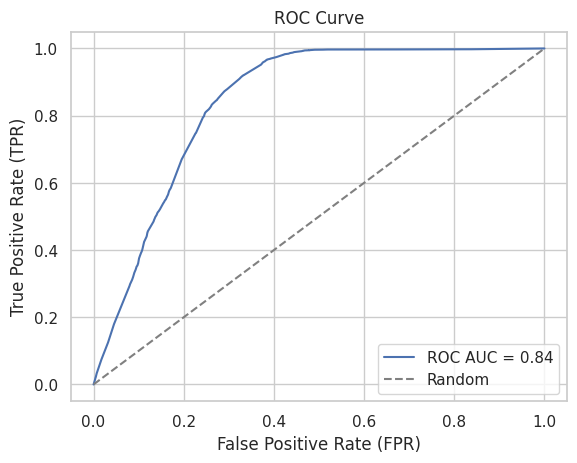

In [66]:
best_params = {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 11, 'min_samples_split': 9, 'splitter': 'best'}
best_dtree = DecisionTreeClassifier(**best_params)
best_dtree.fit(x_train_os, y_train_os)

# Make predictions and calculate probabilities
y_pred = best_dtree.predict(x_test)
y_prob = best_dtree.predict_proba(x_test)[:, 1]

# Calculate evaluation metrics
roc_auc = roc_auc_score(y_test, y_prob)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics

print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Plot ROC Curve
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

**Random Forest**

In [67]:
from sklearn.metrics import make_scorer, roc_auc_score

rf_model = RandomForestClassifier()

param_distributions = {
    'n_estimators': [50, 100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}


# Define the scoring metric
scorer = make_scorer(roc_auc_score)
# Create the RandomizedSearchCV instance
rf_random_search = RandomizedSearchCV(
    rf_model, param_distributions, n_iter=10, scoring=scorer, cv=5, n_jobs=-1, random_state=42
)

# Fit the model to the resampled training set
rf_random_search.fit(x_train_os, y_train_os)

# Get the best hyperparameters
best_params_rf = rf_random_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters for RandomForest:", best_params_rf)

Best Hyperparameters for RandomForest: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20, 'criterion': 'gini'}


ROC AUC: 0.8418


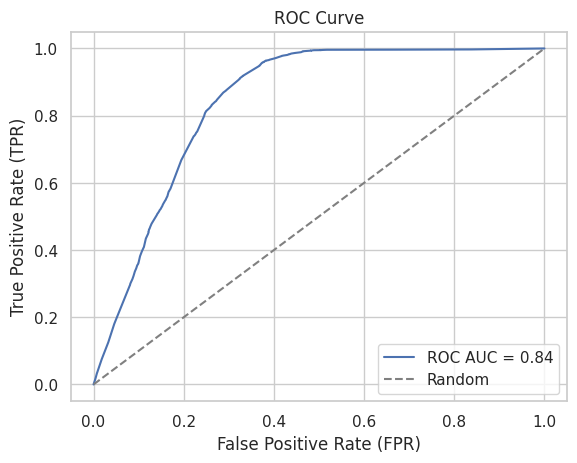

In [68]:
best_params = {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 30, 'criterion': 'entropy', 'bootstrap': True}
best_randomforest = RandomForestClassifier(**best_params)
best_randomforest.fit(x_train_os, y_train_os)

# Make predictions and calculate probabilities
y_pred = best_randomforest.predict(x_test)
y_prob = best_randomforest.predict_proba(x_test)[:, 1]

# Calculate evaluation metrics
roc_auc = roc_auc_score(y_test, y_prob)
f1 = f1_score(y_test, y_pred)

print(f'ROC AUC: {roc_auc:.4f}')

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Plot ROC Curve
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

**CatBoost**

In [102]:
from sklearn.metrics import roc_auc_score, f1_score, precision_recall_curve, auc, precision_score, recall_score
from sklearn.model_selection import StratifiedKFold
from catboost import CatBoostClassifier

# Define StratifiedKFold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics
roc_auc_scores = []
f1_scores = []
precision_scores = []
recall_scores = []
pr_auc_scores = []  # Initialize a list for storing precision-recall AUC scores

# Perform stratified k-fold cross-validation
for train_index, test_index in skf.split(x_train_os, y_train_os):
    x_train_fold, x_val_fold = x_train_os.iloc[train_index], x_train_os.iloc[test_index]
    y_train_fold, y_val_fold = y_train_os.iloc[train_index], y_train_os.iloc[test_index]

    # Create and train CatBoost model
    catboost = CatBoostClassifier(learning_rate=0.03, l2_leaf_reg=1, iterations=500, depth=9, border_count=20, eval_metric='AUC')
    catboost.fit(x_train_fold, y_train_fold, eval_set=(x_val_fold, y_val_fold), early_stopping_rounds=70, verbose=250)

    # Make predictions on the validation set
    y_val_prob = catboost.predict_proba(x_val_fold)[:, 1]
    y_val_pred = catboost.predict(x_val_fold)

    # Calculate evaluation metrics
    roc_auc = roc_auc_score(y_val_fold, y_val_prob)
    f1 = f1_score(y_val_fold, y_val_pred)
    precision = precision_score(y_val_fold, y_val_pred)
    recall = recall_score(y_val_fold, y_val_pred)

    # Calculate precision-recall AUC
    precision, recall, _ = precision_recall_curve(y_val_fold, y_val_prob)
    pr_auc = auc(recall, precision)

    # Append scores to lists
    roc_auc_scores.append(roc_auc)
    f1_scores.append(f1)
    recall_scores.append(recall)
    pr_auc_scores.append(pr_auc)

# Calculate the mean pr_auc score across folds
mean_pr_auc = np.mean(pr_auc_scores)

0:	test: 0.8390641	best: 0.8390641 (0)	total: 83.4ms	remaining: 41.6s
250:	test: 0.8508315	best: 0.8508329 (249)	total: 20.2s	remaining: 20.1s
499:	test: 0.8514198	best: 0.8514306 (461)	total: 38.3s	remaining: 0us

bestTest = 0.8514306327
bestIteration = 461

Shrink model to first 462 iterations.
0:	test: 0.8367164	best: 0.8367164 (0)	total: 81.8ms	remaining: 40.8s
250:	test: 0.8473760	best: 0.8473760 (249)	total: 18.5s	remaining: 18.4s
499:	test: 0.8480804	best: 0.8480804 (499)	total: 36.2s	remaining: 0us

bestTest = 0.8480803671
bestIteration = 499

0:	test: 0.8386221	best: 0.8386221 (0)	total: 77.2ms	remaining: 38.5s
250:	test: 0.8490132	best: 0.8490132 (250)	total: 18.7s	remaining: 18.6s
499:	test: 0.8496384	best: 0.8496386 (498)	total: 36.6s	remaining: 0us

bestTest = 0.8496385884
bestIteration = 498

Shrink model to first 499 iterations.
0:	test: 0.8389499	best: 0.8389499 (0)	total: 75ms	remaining: 37.4s
250:	test: 0.8494013	best: 0.8494030 (249)	total: 18.6s	remaining: 18.4s
499

In [113]:
mean_recall = np.mean([np.mean(recall) for recall in recall_scores])

# Print mean scores
print(f'Mean ROC AUC: {np.mean(roc_auc_scores):.4f}')
print(f'Mean F1 Score: {np.mean(f1_scores):.4f}')
print(f'Mean Recall: {mean_recall:.4f}')
print(f'Mean PR AUC: {mean_pr_auc:.4f}')

Mean ROC AUC: 0.8500
Mean F1 Score: 0.8191
Mean Recall: 0.8588
Mean PR AUC: 0.7899


# Feature Importance
provides insights into which features the model relies on the most for making predictions.

In [1212]:
# Get feature importance
feature_importance = cb_model.get_feature_importance(Pool(data=X_train_preprocessed, label=Y_train, cat_features=cat_features))
# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X_train_preprocessed.columns,
    'Importance': feature_importance
})

# Sort the feature importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

/var/folders/6r/_4z8q6v90cd3yzc9_5vj99h40000gn/T/ipykernel_16288/1328001540.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Feature', y='Importance', data=feature_importance_df, palette="viridis")


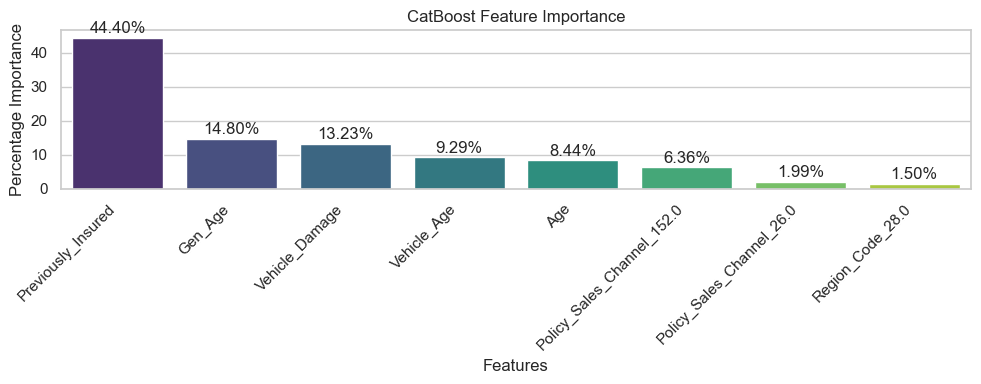

In [1224]:

# Plot feature importance using Seaborn
plt.figure(figsize=(10, 4))
sns.barplot(x='Feature', y='Importance', data=feature_importance_df, palette="viridis")

# Annotate each bar with its percentage value
for index, value in enumerate(feature_importance_df['Importance']):
    plt.text(index, value + 0.5, f'{value:.2f}%', ha='center', va='bottom', rotation=0)

# Customize the plot
plt.title("CatBoost Feature Importance")
plt.xlabel("Features")
plt.ylabel("Percentage Importance")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Evaluation : Compare and Analysis

As our dataset is heavily imbalanced, ROC_AUC could pull down false positive rate due to a large number of true negatives. We would be more considered on **F1 score**

source : https://neptune.ai/blog/f1-score-accuracy-roc-auc-pr-auc
> if you care about ranking predictions, don’t need them to be properly calibrated probabilities, and your dataset is not heavily imbalanced then I would go with ROC AUC.
> 
> If your dataset is **heavily imbalance**d and/or you mostly care about the positive class, I’d consider using F1 score, or Precision-Recall curve and PR AUC.

In [30]:
from sklearn.metrics import roc_auc_score, f1_score, precision_recall_curve, auc, recall_score

models = [best_dtree, best_randomforest]
model_names = [ 'Decision Tree', 'Random Forest']

for model, name in zip(models, model_names):
    y_prob = model.predict_proba(x_test)[:, 1]
    y_pred = model.predict(x_test)

    roc_auc = roc_auc_score(y_test, y_prob)
    f1 = f1_score(y_test, y_pred)
    
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(recall, precision)  # Calculate precision-recall AUC
    
    recall = recall_score(y_test, y_pred)
    print(f'{name} \n  ROC AUC: {roc_auc:.4f} - F1 Score: {f1:.4f} - PR AUC: {pr_auc:.4f} - Recall: {recall:.4f}\n')

print(f' CatBoost Average Score\n')
print(f'ROC AUC: {np.mean(roc_auc_scores):.4f} - F1 Score: {np.mean(f1_scores):.4f} - PR AUC: {mean_pr_auc:.4f} - Recall: {mean_recall:.4f}\n

Decision Tree
	ROC AUC: 0.8426 - F1 Score: 0.4119 - PR AUC: 0.3270 - Recall: 0.9501
Random Forest
	ROC AUC: 0.8418 - F1 Score: 0.4126 - PR AUC: 0.3253 - Recall: 0.9485
CatBoost Average Score
	ROC AUC: 0.8500 - F1 Score: 0.8191 - PR AUC: 0.7899 - Recall: 0.8588


Final Decision
> **CatBoost model** is indeed performing better than the other models in terms of F1 Score, and Recall.

**Measures the ability of the model to correctly identify customers who are genuinely interested.**
> A high **Recall** indicates a lower rate of False Negatives:

> A high **Precision** indicates a lower rate of False Positives

# And how can we apply about trade-off between Precision and Recall?

# In insurance and financial field, we should also prioritize considering 
**False Negatives (Type II Errors):**
> Failing to predict interest when the customer is actually interested leading to a loss of potential revenue and market share. The cost of false negatives may include missed sales opportunities, reduced revenue, and potential long-term impact on customer relationships.

while False Positives (Type I Errors):
Predicting interest when the customer is not actually interested. This may lead to spending resources on targeting customers who are not likely to purchase, resulting in wasted marketing efforts and potential annoyance to customers.

# Prediction on actual Test Data
* Predict on **Response** and **Probability of interested**
* Model Feature Importance
* More implementing recommendations for raising customer interest

In [1190]:
test_data = pd.read_csv("/Users/joesrwt/Desktop/sip 2025 joee/cross sell prediction/test.csv")

In [1192]:
# Assign raw data to test_data
test_data = raw.copy()

# Apply the same transformations to test_data as done to raw
test_data.loc[test_data['Gender'] == 'Male', 'Gender'] = 1
test_data.loc[test_data['Gender'] == 'Female', 'Gender'] = 0

test_data.loc[test_data['Vehicle_Damage'] == 'Yes', 'Vehicle_Damage'] = 1
test_data.loc[test_data['Vehicle_Damage'] == 'No', 'Vehicle_Damage'] = 0

test_data.loc[test_data['Vehicle_Age'] == '< 1 Year', 'Vehicle_Age'] = 0
test_data.loc[test_data['Vehicle_Age'] == '1-2 Year', 'Vehicle_Age'] = 1
test_data.loc[test_data['Vehicle_Age'] == '> 2 Years', 'Vehicle_Age'] = 2

test_data['Gen_Age'] = pd.cut(test_data.Age, bins, labels=labels, include_lowest=True)

# One-hot encoding for test data
ohe_train_dense_test = ohe_encoder.transform(test_data[ohe_col])
ohe_train_df_test = pd.DataFrame(ohe_train_dense_test, columns=ohe_encoder.get_feature_names_out(ohe_col), index=test_data.index)

# Drop the original columns and concatenate the One-Hot encoded features to test_data
test_data_encoded = test_data.drop(columns=ohe_col)
test_data_encoded = pd.concat([test_data_encoded, ohe_train_df_test], axis=1)



kbest = ['Vehicle_Damage', 'Previously_Insured',
       'Policy_Sales_Channel_152.0', 'Vehicle_Age', 'Gen_Age',
       'Policy_Sales_Channel_26.0', 'Region_Code_28.0', 'Age']
# Select the relevant columns (KBest)
test_data_encoded_kbest = test_data_encoded[kbest]


In [1196]:
catboost_pipeline = Pipeline([
    ('FeatureAdding', FeatureAdding(x_train_baseline=X_train_selected)),  
    ('preprocessor', preprocessor),
    ('to_dataframe', DataFrameTransformer(num_col=num_col, cat_col=cat_col)),
])

# Fit and transform the training data
test_df = catboost_pipeline.fit_transform(test_data_encoded_kbest)
test_df

,Age,Vehicle_Age,Gen_Age,Vehicle_Damage,Previously_Insured,Policy_Sales_Channel_152.0,Policy_Sales_Channel_26.0,Region_Code_28.0
0,0.333777,2.0,1.0,1.0,0.0,0.0,1.0,1.0
1,2.396751,1.0,3.0,0.0,0.0,0.0,1.0,0.0
2,0.527181,2.0,2.0,1.0,0.0,0.0,1.0,1.0
3,-1.148985,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,-0.633242,0.0,1.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
381104,2.267815,1.0,3.0,0.0,1.0,0.0,1.0,0.0
381105,-0.568774,0.0,1.0,0.0,1.0,1.0,0.0,0.0
381106,-1.148985,0.0,0.0,0.0,1.0,0.0,0.0,0.0
381107,1.881007,2.0,3.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier

best_model = CatBoostClassifier(learning_rate=0.03, l2_leaf_reg=1, iterations=500, depth=9, border_count=20, eval_metric='f1')
best_model.fit(x_train_os, y_train_os)

# Use predict_proba to get class probabilities
y_pred_prob = best_model.predict_proba(test_df)[:, 1]  # Use the probability of the positive class
# Create a DataFrame with the predicted probabilities
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Interested'])

In [78]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier

best_model = CatBoostClassifier(learning_rate=0.03, l2_leaf_reg=1, iterations=500, depth=9, border_count=20, eval_metric='AUC')
best_model.fit(x_train_os, y_train_os)

# Use predict_proba to get class probabilities
y_pred_prob = best_model.predict_proba(test_df)[:, 1]  # Use the probability of the positive class
# Create a DataFrame with the predicted probabilities
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Interested'])

0:	total: 89.8ms	remaining: 44.8s
1:	total: 167ms	remaining: 41.7s
2:	total: 241ms	remaining: 39.9s
3:	total: 320ms	remaining: 39.7s
4:	total: 399ms	remaining: 39.5s
5:	total: 477ms	remaining: 39.3s
6:	total: 565ms	remaining: 39.8s
7:	total: 642ms	remaining: 39.5s
8:	total: 721ms	remaining: 39.3s
9:	total: 802ms	remaining: 39.3s
10:	total: 882ms	remaining: 39.2s
11:	total: 957ms	remaining: 38.9s
12:	total: 1.04s	remaining: 39.2s
13:	total: 1.12s	remaining: 38.9s
14:	total: 1.2s	remaining: 38.8s
15:	total: 1.28s	remaining: 38.7s
16:	total: 1.35s	remaining: 38.5s
17:	total: 1.43s	remaining: 38.2s
18:	total: 1.49s	remaining: 37.7s
19:	total: 1.57s	remaining: 37.6s
20:	total: 1.65s	remaining: 37.6s
21:	total: 1.72s	remaining: 37.5s
22:	total: 1.8s	remaining: 37.4s
23:	total: 1.88s	remaining: 37.2s
24:	total: 1.96s	remaining: 37.2s
25:	total: 2.04s	remaining: 37.2s
26:	total: 2.12s	remaining: 37.1s
27:	total: 2.2s	remaining: 37.1s
28:	total: 2.28s	remaining: 37s
29:	total: 2.36s	remaining: 

# Prediction on Response and Probability of interested

In [79]:
cust_id = test_data[['id']]
y_pred_prob_df['id'] = cust_id
threshold= 0.5
y_pred_binary = (y_pred_prob > threshold).astype(int)

# Extract customer IDs from the original test data
cust_id = test_data[['id']]
result_df = pd.DataFrame({'id': cust_id['id'], 'Interested': y_pred_prob, 'Response': y_pred_binary})
result_df

,id,Interested,Response
0,381110,0.002237,0
1,381111,0.630170,1
2,381112,0.668322,1
3,381113,0.077095,0
4,381114,0.002237,0
...,...,...,...
127032,508142,0.000354,0
127033,508143,0.599169,1
127034,508144,0.002225,0
127035,508145,0.002545,0


To turn high-potential leads into actual vehicle insurance customers, employ personalized and tailor-made strategies. 
# More implementing recommendations for raising customer interest : 

**Target Customer Profile**

> Efforts towards Millennials and Gen X, as they seem to be the primary target demographic for vehicle insurance.

> First-Time Vehicle Insurance Seekers: Develop campaigns or messages that appeal to individuals who have never had vehicle insurance before.

**Potential Channels and Areas for Engagement:**

Policy Sales Channels 26 and 124: 
> Prioritize sales efforts through channels 26 and 124, as they have shown the highest numbers of interested customers. Additionally, these channels have a high concentration of Millennials and Gen X, making them well-suited for the target demographic.

Digital Engagement Channel (Channel 152):
> Gen Z Targeting: Utilize Channel 152 to engage with customers who enjoy digital experiences, particularly targeting Gen Z. Tailor digital marketing strategies to resonate with this generation.

>**Limitations for Boomers and Gen X:** Recognize that Channel 152 may not be as effective for reaching Boomers and Gen X, who may prefer traditional forms of interaction. Consider a multi-channel approach to cater to diverse preferences.

Potential Area : Region Code 28
>Consider focusing efforts in Region Code 28, as it has shown a significant concentration of interested customers.

# End of Project
***